# Table of Contents

* [Natural Language Processing](#part1)
    * [Loading libraires and dataset](#chapter0)
    * [Exploratory data analysis](#chapter1)
    * [Tokenization](#chapter2)
         * [Cleaning](#section_1_1)
         * [Translation](#section_1_2)
         * [Rare tokens](#section_1_3)
         * [Dividing corpus](#section_1_4)
         * [Name entity recognition](#section_1_5)    
    * [Cleaning function, processing](#chapter3)
    * [Clustering](#chapter4)
        * [Bag of word, Tf-idf](#section_2_1)
        * [Bayes](#section_2_2)
        * [Word2Vec](#section_2_3)
        * [Bert](#section_2_4)
        * [USE](#section_2_5)
    * [Annexe: Spacy](#chapter5)

# Loading libraires and dataset <a class="anchor" id='chapter0'></a>

In [1]:
import pandas as pd

import os
working_directory = os.getcwd()
print(working_directory)

/Users/jeaneudesdesgraviers/Downloads


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob 
from textblob import Word
import string

import spacy

from langdetect import detect
from google_trans_new import google_translator 

import sys, time

# Exploratory analysis <a class="anchor" id='chapter1'></a>

In [3]:
#loading dataset
path = working_directory + '/Flipkart/flipkart_com-ecommerce_sample_1050.csv'
df = pd.read_csv(path)
df

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [4]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
#examination

In [6]:
df.sample(5)

uniq_id            crawl_timestamp  \
771  42643c1c9403f67921a18654bcf45ead  2015-12-12 11:46:53 +0000   
0    55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
291  8876d7569efdaff5a21b33a1ab44a13d  2016-03-02 16:58:31 +0000   
967  d627a270302d23eef773d05ad01fd03c  2016-05-26 12:20:35 +0000   
135  fd369a1bb58ae02cd925dda7e9e1d00a  2015-12-01 12:40:44 +0000   

                                           product_url  \
771  http://www.flipkart.com/offspring-printed-sing...   
0    http://www.flipkart.com/elegance-polyester-mul...   
291  http://www.flipkart.com/mkb-baby-girl-s-shirt-...   
967  http://www.flipkart.com/mahadev-handicrafts-co...   
135  http://www.flipkart.com/prithish-working-my-ow...   

                                          product_name  \
771              Offspring Printed Single Blanket Blue   
0    Elegance Polyester Multicolor Abstract Eyelet ...   
291                        MKB Baby Girl's Shirt Dress   
967  Mahadev Handicrafts Cotton Cartoon Double Beds...   
135       Prithish Working on my own Grass Ceramic Mug   

                                 product_category_tree               pid  \
771  ["Baby Care >> Baby Bedding >> Baby Blankets >...  BLAE8BUKZ9SMGSDW   
0    ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
291  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEGCS8RJAYEGAR   
967  ["Baby Care >> Baby Bedding >> Baby Bedsheets ...  BDSEGUPCQZVXEPAF   
135  ["Kitchen & Dining >> Coffee Mugs >> Prithish ...  MUGE8S9KB8DUER6P   

     retail_price  discounted_price                                 image  \
771         399.0             305.0  42643c1c9403f67921a18654bcf45ead.jpg   
0          1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
291         825.0             625.0  8876d7569efdaff5a21b33a1ab44a13d.jpg   
967        1499.0             899.0  d627a270302d23eef773d05ad01fd03c.jpg   
135         499.0             175.0  fd369a1bb58ae02cd925dda7e9e1d00a.jpg   

     is_FK_Advantage_product  \
771                    False   
0                      False   
291                    False   
967                    False   
135                    False   

                                           description       product_rating  \
771  Offspring Printed Single Blanket Blue (1 Blank...  No rating available   
0    Key Features of Elegance Polyester Multicolor ...  No rating available   
291  Key Features of MKB Baby Girl's Shirt Dress Ma...  No rating available   
967  Key Features of Mahadev Handicrafts Cotton Car...  No rating available   
135  Prithish Working on my own Grass Ceramic Mug (...  No rating available   

          overall_rating                brand  \
771  No rating available            Offspring   
0    No rating available             Elegance   
291  No rating available                  MKB   
967  No rating available  Mahadev Handicrafts   
135  No rating available                  NaN   

                                product_specifications  
771  {"product_specification"=>[{"key"=>"Machine Wa...  
0    {"product_specification"=>[{"key"=>"Brand", "v...  
291  {"product_specification"=>[{"value"=>"1 Dress"...  
967  {"product_specification"=>[{"key"=>"Brand", "v...  
135  {"product_specification"=>[{"key"=>"Type", "va...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [8]:
df.product_category_tree.unique()

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

In [9]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

In [10]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [11]:
df.brand.value_counts()

PRINT SHAPES          11
Lapguard              11
Lal Haveli            10
Raymond                8
Aroma Comfort          8
                      ..
Rute                   1
NAMS                   1
JewelKraft Designs     1
Budding Bees           1
Zero                   1
Name: brand, Length: 490, dtype: int64

In [12]:
# valeurs manquantes et dupliquées

df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

<Axes: >

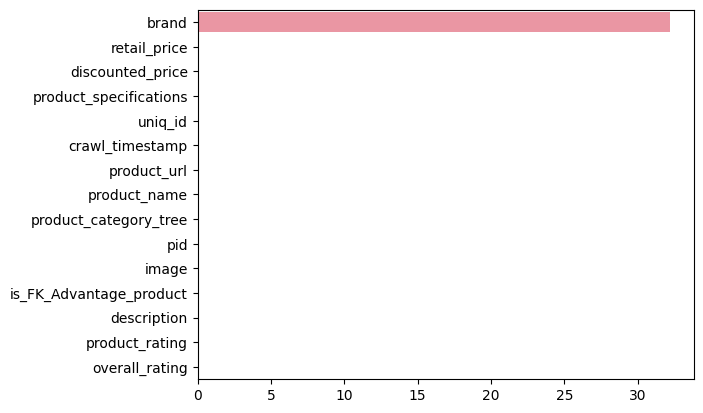

In [13]:
data_nan = df.isna().sum().sort_values(ascending=False)
sns.barplot(x=data_nan.values /df.shape[0]*100, y = data_nan.index)

In [14]:
#looking for duplicated values
df.duplicated().sum()

0

In [15]:
#trying on subset description
df.duplicated(subset='description').sum()

0

In [16]:
for col in df.columns:
    n = df.duplicated(subset=col).sum()
    print(f'duplicated for {col} is {n}')

duplicated for uniq_id is 0
duplicated for crawl_timestamp is 901
duplicated for product_url is 0
duplicated for product_name is 0
duplicated for product_category_tree is 408
duplicated for pid is 0
duplicated for retail_price is 695
duplicated for discounted_price is 625
duplicated for image is 0
duplicated for is_FK_Advantage_product is 1048
duplicated for description is 0
duplicated for product_rating is 1023
duplicated for overall_rating is 1023
duplicated for brand is 559
duplicated for product_specifications is 65


In [17]:
#some of the columns seem to have a lot of same value, thus difficult to get data out of it

In [18]:
#dropping duplicates if necessary

#idx = df.duplicated(subset = 'product_specifications', keep='first')
#df.loc[idx,:].sort_values('product_specifications')

In [19]:
#In this case there might be different colors of same product

In [20]:
#Inspection on numerical datas

df.describe(include=np.number)

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

<Axes: >

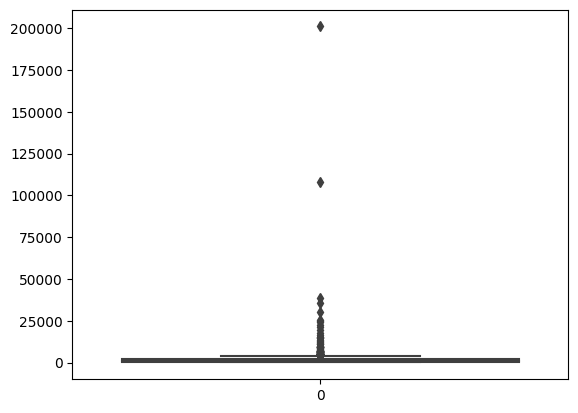

In [21]:
tmp = df.retail_price
sns.boxplot(tmp)

In [22]:
df.loc[df['retail_price'].idxmin()]

uniq_id                                     aa68675f50a0551b8dadb954017a50a1
crawl_timestamp                                    2016-04-15 20:20:45 +0000
product_url                http://www.flipkart.com/geol-wooden-wet-dry-br...
product_name                                   Geol Wooden Wet and Dry Broom
product_category_tree      ["Kitchen & Dining >> Housekeeping & Laundry >...
pid                                                         BMBEHPAGGDSSYMUZ
retail_price                                                            35.0
discounted_price                                                        35.0
image                                   aa68675f50a0551b8dadb954017a50a1.jpg
is_FK_Advantage_product                                                False
description                Specifications of Geol Wooden Wet and Dry Broo...
product_rating                                           No rating available
overall_rating                                           No rating available

In [23]:
df.loc[df['retail_price'].idxmax()]

uniq_id                                     08452abdadb3db1e686b94a9c52fc7b6
crawl_timestamp                                    2015-12-04 07:25:36 +0000
product_url                http://www.flipkart.com/cartier-w6701005-analo...
product_name                  Cartier W6701005 Analog Watch  - For Boys, Men
product_category_tree      ["Watches >> Wrist Watches >> Cartier Wrist Wa...
pid                                                         WATEAK8SE2RUK7GM
retail_price                                                        201000.0
discounted_price                                                    201000.0
image                                   08452abdadb3db1e686b94a9c52fc7b6.jpg
is_FK_Advantage_product                                                False
description                Cartier W6701005 Analog Watch  - For Boys, Men...
product_rating                                           No rating available
overall_rating                                           No rating available

In [24]:
# the maximum price is for a watch from cartier which seems possible, thus not dropping it

In [25]:
df.describe(include=object)

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   

                                              product_url  \
count                                                1050   
unique                                               1050   
top     http://www.flipkart.com/elegance-polyester-mul...   
freq                                                    1   

                                             product_name  \
count                                                1050   
unique                                               1050   
top     Elegance Polyester Multicolor Abstract Eyelet ...   
freq                                                    1   

                                    product_category_tree               pid  \
count                                                1050              1050   
unique                                                642              1050   
top     ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z   
freq                                                   56                 1   

                                       image  \
count                                   1050   
unique                                  1050   
top     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq                                       1   

                                              description  \
count                                                1050   
unique                                               1050   
top     Key Features of Elegance Polyester Multicolor ...   
freq                                                    1   

             product_rating       overall_rating         brand  \
count                  1050                 1050           712   
unique                   27                   27           490   
top     No rating available  No rating available  PRINT SHAPES   
freq                    889                  889            11   

                                   product_specifications  
count                                                1049  
unique                                                984  
top     {"product_specification"=>[{"key"=>"Type", "va...  
freq                                                   22

In [26]:
# 22 products of same specification

In [27]:
#try to drop duplicates on product_specifications, in this case don't do because can have same product of different colors
#df.drop_duplicates(subset = 'product_specifications', inplace = True)

In [28]:
#show length of description

df.description.apply(lambda i : len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: description, Length: 1050, dtype: int64

<Axes: >

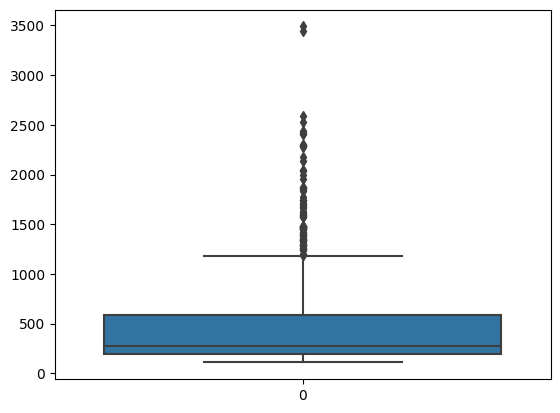

In [29]:
tmp = df.description.str.len()
sns.boxplot(tmp)

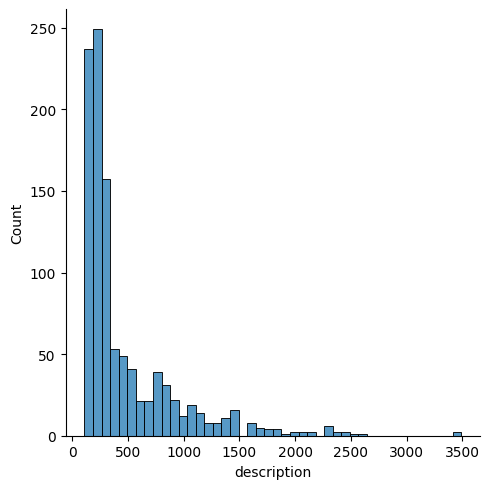

In [30]:
sns.displot(tmp)

In [31]:
# majority of description seems to be from 150 to 500 words

In [32]:
df.loc[df.description.str.len().idxmax()]

uniq_id                                     b6c339777814451815fe7950fd4c8536
crawl_timestamp                                    2016-06-16 08:51:06 +0000
product_url                http://www.flipkart.com/homeedge-solid-wood-ki...
product_name                                    HomeEdge Solid Wood King Bed
product_category_tree      ["Beauty and Personal Care >> Health Care >> H...
pid                                                         BDDEH93ZEEZY7CHM
retail_price                                                         25499.0
discounted_price                                                     18799.0
image                                   b6c339777814451815fe7950fd4c8536.jpg
is_FK_Advantage_product                                                False
description                Key Features of HomeEdge Solid Wood King Bed K...
product_rating                                           No rating available
overall_rating                                           No rating available

In [33]:
df.loc[df.description.str.len().idxmax(),'description']

"Key Features of HomeEdge Solid Wood King Bed King Bed 72x78 Mattress Size 1 King Bed Natural Polish,HomeEdge Solid Wood King Bed (Finish Color -  Natural) Price: Rs. 18,799 Made to Order SolidWood Bed made by the finest artisans from Rajasthan. Bed is made to perfection. These Beds are handicraft products which are made to order by the manufacturer. Please make sure that this bed is ordered once you are aware of the entire product. Mattress Dimension of a Queen Size Bed will be 60inch x 78inch and Mattress Dimension of a King Bed will be 72inch x 78inch. Kindly check the mattress size before you order the bed. Also, the polish might have a slight variation as these are wooden products and grains are not uniform. due to grains the polish might look light or dark in some portions. All the Wooden products are termite treated and has gone through a high level quality check before being packed.,Specifications of HomeEdge Solid Wood King Bed (Finish Color -  Natural) Installation & Demo Ins

In [34]:
# creating column with length of description for further analysis

df['_len_text'] = tmp

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_1030/3864384077.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

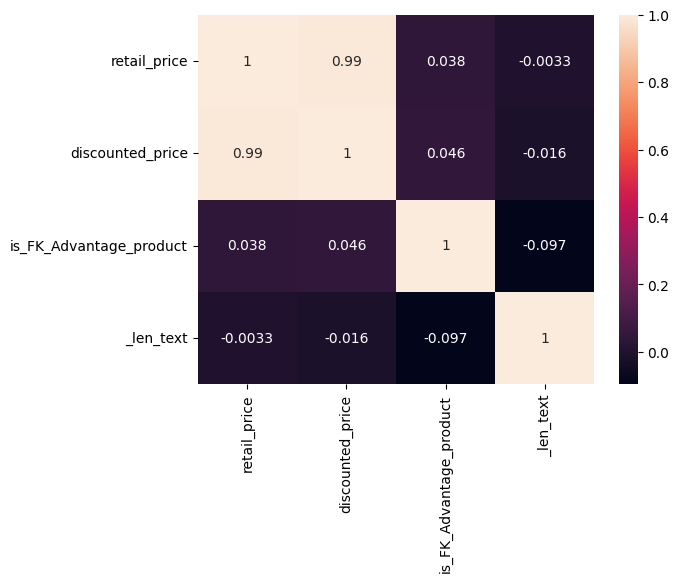

In [35]:
# correlation matrix for numerical variable correlation analysis

corr = df.corr()
sns.heatmap(corr, annot=True)

In [36]:
#price is correlated with discounted price, which seems consistent.

In [37]:
df.sort_values('_len_text')

uniq_id            crawl_timestamp  \
877   c943647eee4de99fc1b4e233b9a7f47d  2015-12-20 08:26:17 +0000   
890   72db37ec42ee76d79cf395221e0f4cce  2015-12-20 08:26:17 +0000   
1030  4d6bf06ef01f80130a1ab28dfdeb7aa3  2016-03-03 06:06:42 +0000   
651   705b90361aeda1849a728d80625a78a9  2015-12-31 09:19:31 +0000   
892   6858fd9265d348803b18667fe43cd054  2015-12-20 08:26:17 +0000   
...                                ...                        ...   
589   621a88993a7033df3440ec816c2e386f  2016-05-10 11:57:25 +0000   
916   c5c559012b742d9966df82182b90c6da  2016-06-20 11:04:25 +0000   
715   d68b774e9529a4b94a5c6c8943a1b8b3  2016-01-01 19:37:22 +0000   
639   aeb421e416716d5f037d50e8c3b14cd7  2016-06-22 20:52:57 +0000   
437   b6c339777814451815fe7950fd4c8536  2016-06-16 08:51:06 +0000   

                                            product_url  \
877   http://www.flipkart.com/nkp-cotton-bath-towel/...   
890   http://www.flipkart.com/iws-cotton-bath-towel/...   
1030  http://www.flipkart.com/omrd-rd6697-hot-cold-p...   
651   http://www.flipkart.com/marvel-cotton-bath-tow...   
892   http://www.flipkart.com/mb-cotton-set-towels/p...   
...                                                 ...   
589   http://www.flipkart.com/shopfloor-xyz-vacuum-c...   
916   http://www.flipkart.com/wallskart-floral-botan...   
715   http://www.flipkart.com/pioneer-pragati-floral...   
639   http://www.flipkart.com/sunlast-16-inch-laptop...   
437   http://www.flipkart.com/homeedge-solid-wood-ki...   

                                           product_name  \
877                               Nkp Cotton Bath Towel   
890                               IWS Cotton Bath Towel   
1030                      OMRD RD6697 Hot and cold Pack   
651                            Marvel Cotton Bath Towel   
892                             MB Cotton Set of Towels   
...                                                 ...   
589   Shopfloor.XYZ Vacuum Cleaner for Computers, La...   
916              wallskart Floral & Botanical Wallpaper   
715          Pioneer Pragati Floral Single Duvet Orange   
639                     Sunlast 16 inch Laptop Backpack   
437                        HomeEdge Solid Wood King Bed   

                                  product_category_tree               pid  \
877         ["Home Furnishing >> Bath Linen >> Towels"]  BTWEBZYHA6ZFBWK4   
890         ["Home Furnishing >> Bath Linen >> Towels"]  BTWE88GQZKD6N3VX   
1030  ["Beauty and Personal Care >> Health Care >> M...  HCPEFNFMYAUM6CNN   
651   ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEE4HMGWFQPGWH   
892         ["Home Furnishing >> Bath Linen >> Towels"]  BTWEYFA942QUCJ6Q   
...                                                 ...               ...   
589   ["Computers >> Laptop Accessories >> Cleaning ...  CLKEGH4ADYDTQFHE   
916   ["Home Decor & Festive Needs >> Wall Decor & C...  WLPEJ5VGMYBYGGX7   
715   ["Home Furnishing >> Bed Linen >> Blankets, Qu...  BLAEDAN7HXG3CAHD   
639   ["Computers >> Laptop Accessories >> Laptop Ba...  LTBEJTHWEWWGGKUY   
437   ["Beauty and Personal Care >> Health Care >> H...  BDDEH93ZEEZY7CHM   

      retail_price  discounted_price                                 image  \
877          599.0             549.0  c943647eee4de99fc1b4e233b9a7f47d.jpg   
890          599.0             299.0  72db37ec42ee76d79cf395221e0f4cce.jpg   
1030         399.0             269.0  4d6bf06ef01f80130a1ab28dfdeb7aa3.jpg   
651          449.0             449.0  705b90361aeda1849a728d80625a78a9.jpg   
892         1495.0            1195.0  6858fd9265d348803b18667fe43cd054.jpg   
...            ...               ...                                   ...   
589          399.0             269.0  621a88993a7033df3440ec816c2e386f.jpg   
916          599.0             299.0  c5c559012b742d9966df82182b90c6da.jpg   
715         1999.0            1099.0  d68b774e9529a4b94a5c6c8943a1b8b3.jpg   
639         2600.0            2348.0  aeb421e416716d5f037d50e8c3b14cd7.jpg   
4

In [38]:
# manually checking for duplicates

df.loc[df['uniq_id'].str.contains("009", case=False)]

uniq_id            crawl_timestamp  \
86    0096e89cc25a8b96fb9808716406fe94  2016-06-17 14:13:36 +0000   
89    aebf3a2172b33ef09acb472009967812  2016-01-04 00:20:04 +0000   
280   009099b1f6e1e8f893ec29a7023153c4  2016-04-24 18:34:50 +0000   
304   95cb9561009bd6707c67f05e6a00c16e  2015-12-01 06:13:00 +0000   
325   3945cc3920106c04648e8ba17ef2b009  2015-12-01 06:13:00 +0000   
336   6634de7b39a5b0658c74ab098450096d  2015-12-01 06:13:00 +0000   
419   e365b55f806e5d0abe0094a9f2590e33  2015-12-01 06:13:00 +0000   
489   5a5bb03499009f35759258263fc834a3  2016-01-07 05:50:25 +0000   
494   a124d6e4c30b00918c594289266a383c  2016-01-07 05:50:25 +0000   
529   c8c7385b1b9589f009aa836f0590e646  2016-01-07 05:50:25 +0000   
785   29d7a1b4d4f658fc3082905f65e1b009  2015-12-12 11:46:53 +0000   
850   fc009e0b404034e5ea065ba980917f33  2015-12-29 05:07:38 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   

                                            product_url  \
86    http://www.flipkart.com/oxford-tawa-15-cm-diam...   
89    http://www.flipkart.com/parv-collections-showp...   
280   http://www.flipkart.com/palito-plo-166-analog-...   
304   http://www.flipkart.com/homedesires-showpiece-...   
325   http://www.flipkart.com/anna-andre-paris-majes...   
336   http://www.flipkart.com/d-link-dir-816-wireles...   
419   http://www.flipkart.com/tenda-3g622r/p/itmdp2c...   
489   http://www.flipkart.com/lapguard-hp-pavilion-d...   
494   http://www.flipkart.com/sonata-gold-plated-gol...   
529   http://www.flipkart.com/times-317tms317-party-...   
785   http://www.flipkart.com/funcart-frolic-birthda...   
850   http://www.flipkart.com/techone-portable-power...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   

                                           product_name  \
86                        oxford Tawa 15 cm cm diameter   
89                 Parv Collections Showpiece  -  12 cm   
280     palito PLO 166 Analog Watch  - For Girls, Women   
304                   Homedesires Showpiece  -  10.5 cm   
325      Anna Andre Paris Majesty & Floralina Combo Set   
336      D-Link DIR-816 Wireless AC750 Dual Band Router   
419                                       Tenda 3G622R+   
489   Lapguard HP Pavilion DV4129EA Compatible Black...   
494    Sonata Gold Plated GOLDP Analog Watch  - For Men   
529   Times 317TMS317 Party-Wedding Analog Watch  - ...   
785       Funcart Frolic Birthday  - Food Grade Plastic   
850   Techone+ Portable Power Bank, and Laptops_2 se...   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   

                                  product_category_tree               pid  \
86    ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPEJQR9VKFUV4HY   
89    ["Home Decor & Festive Needs >> Showpieces >> ...  SHIE4THT2KHHGU8H   
280   ["Watches >> Wrist Watches >> palito Wrist Wat...  WATEHZPFAPQKUASQ   
304   ["Home Decor & Festive Needs >> Showpieces >> ...  SHIECV5BYUZEQJT7   
325   ["Beauty and Personal Care >> Fragrances >> De...  CAGDUGFYGG2KWWK7   
336   ["Computers >> Network Components >> Routers >...  RTRE3XW7JS6YJHG5   
419   ["Computers >> Network Components >> Routers >...  RTRDNGVMCGNCTWUU   
489   ["Computers >> Laptop Accessories >> Batteries...  ACCDY6GYCSJ2UTHY   
494   ["Watches >> Wrist Watches >> Sonata Wrist Wat...  WATEAAV6RFAR78T4   
529   ["Watches >> Wrist Watches >> Times Wrist Watc...  WATE8H957FY57WCH   
785   ["Baby Care >> Feeding & Nursing >> Utensils >...  FDUE6ZHHR9AAKU2B   
850   ["Computers >> Laptop Accessories >> USB Gadge...  USGEE5MZ6CAMSUYT   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   

      retail_price  discounted_price                                 image  \
86           699.0             659.0  0096e89cc25a8b96fb9808716406fe94.jpg   
89          1500.0            1085.0  aebf3a2172b33ef09acb472009967812.jpg   
280         1500.0             199.0  009099b1f6e1e8f893ec29a7023153c4.jpg   
304          899.0 

In [39]:
# creating dg only with description

df_description = df.loc[:,['uniq_id','description']]
df_description

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                            description  
0     Key Features of Elegance Polyester Multicolor ...  
1     Specifications of Sathiyas Cotton Bath Towel (...  
2     Key Features of Eurospa Cotton Terry Face Towe...  
3     Key Features of SANTOSH ROYAL FASHION Cotton P...  
4     Key Features of Jaipur Print Cotton Floral Kin...  
...                                                 ...  
1045  Oren Empower Extra Large Self Adhesive Sticker...  
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...  
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...  

[1050 rows x 2 columns]

In [40]:
# Explore corpus and documents

In [41]:
df_samp = df_description.sample(10)
df_samp

uniq_id  \
229  caabe6014b914fe2874a9a8d7284f79b   
538  3864ab10ef7006452fef45513de8f868   
944  8b7a51c69b47f4714b5f7131077b5d30   
594  3589e80e8f7f3f3a5b65447389b90c2e   
984  357432a848c3f13fa614efe5dddd99b6   
981  86089ddd9f9e52127ce838f210f776d7   
455  3b0f02b3acf1825f8bbc1fb3b860dbb8   
46   3388d05e88972ff9f3e1321dc0cfdc28   
44   8050d31bffe6827c804b8222338aafb2   
694  0ae859a69c7608d8197c3ba8c37bc6ec   

                                           description  
229  Buy Surface 180 Elephant Shape Handpainted Woo...  
538  Sonata 7092SL01 Yuva Analog Watch  - For Men -...  
944  Buy Weldecor 1800 inch Red Rice Lights for Rs....  
594  Key Features of Miracle Retail Bonsai Wild Pla...  
984  Buy Art Godaam Colored figure Showpiece  -  50...  
981  Specifications of Aarika Self Design Kurta & P...  
455  Flipkart.com: Buy Milton School 750 ml Water B...  
46   Key Features of AKUP keep-calm Ceramic Mug Pac...  
44   Key Features of AKUP i-loves-music Ceramic Mug...  
694  Tallenge Christmas Collection - Echoes Of Wint...

In [42]:
# reading to see what kind of information is displayed in the description

for idx, ser in df_samp.iterrows():
    print(f"idx {idx} : {ser['description']}\n")

idx 229 : Buy Surface 180 Elephant Shape Handpainted Wooden Round Stool Showpiece  -  17.78 cm for Rs.4704 online. Surface 180 Elephant Shape Handpainted Wooden Round Stool Showpiece  -  17.78 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 538 : Sonata 7092SL01 Yuva Analog Watch  - For Men - Buy Sonata 7092SL01 Yuva Analog Watch  - For Men  7092SL01 Online at Rs.999 in India Only at Flipkart.com. Contemporary Dial, Black Strap, Stainless Steel Back Case, Water Resistant, Buckle Clasp - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!

idx 944 : Buy Weldecor 1800 inch Red Rice Lights for Rs.5999 online. Weldecor 1800 inch Red Rice Lights at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 594 : Key Features of Miracle Retail Bonsai Wild Plant Artificial Plant  with Pot Premium quality soft plastic Artificial

# Tokenization <a class="anchor" id='chapter2'></a>

# Cleaning des description <a class="anchor" id='section_1_1' ></a>

In [43]:
# Import NLP libraries

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from PIL import Image
from wordcloud import WordCloud

from pandarallel import pandarallel

#notes : rare
#        too often
#        duplicates
#        observation : textblob, translation (modules), spacy : language detection, lem/stem (showpiec)

In [44]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jeaneudesdesgraviers/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeaneudesdesgraviers/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeaneudesdesgraviers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jeaneudesdesgraviers/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [45]:
# Working on the entire corpus

raw_corpus = "".join(df.description.values)
raw_corpus[:3000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [46]:
pandarallel.initialize(progress_bar=True,
                      nb_workers=6)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [47]:
sns.set()

In [48]:
df_description.shape

(1050, 2)

In [49]:
# tokenization (réduire en un ensemble de bric, dans cet exemple : ne conserver que les mots)

# Stopwords = mots trop génériques pour etre informatifs
# supprimer les stopwords en filtrant les elements qui ne sont pas dans la liste

In [50]:
#nombre de mots dans la liste, dédoublonnée
#len(set(tokens))

In [51]:
def display_tokens_info(tokens):
    print(f"nb of token is {len(tokens)} and unique nb of token is {len(set(tokens))}")
    print(tokens)

In [52]:
# Essayer un autre tokenizer : Regex tokenizer

#tokenizer = RegexpTokenizer(r"\w+")
#tokens = tokenizer.tokenize(doc)
#display_tokens_info(tokens)

In [53]:
df.iloc[240:250,:]

uniq_id            crawl_timestamp  \
240  7e4c1d31e279a700c6b8e66d820e8601  2015-12-01 12:40:44 +0000   
241  1357e9d24661c3b5797aa1016e0c3be1  2015-12-01 12:40:44 +0000   
242  799ddb97164ff2d5d53bb8b27b8c355f  2015-12-01 12:40:44 +0000   
243  607dc41467008ee7a8dba0276f180f63  2015-12-01 12:40:44 +0000   
244  0c4718ae90f2889b7021a99ee1cc106c  2015-12-01 12:40:44 +0000   
245  85fe188e1ee8237b70df0d475907bf24  2015-12-01 12:40:44 +0000   
246  ea42376c9c52752d9d01bba12eb2999b  2015-12-01 12:40:44 +0000   
247  87f1807e002d3555b8dfb465a8a61df2  2015-12-01 12:40:44 +0000   
248  45d0af2c709de47268c80c35a117de44  2015-12-01 12:40:44 +0000   
249  0131e5d87b72877702d536299cf83b75  2015-12-01 12:40:44 +0000   

                                           product_url  \
240  http://www.flipkart.com/kosher-kadhai-5-l/p/it...   
241  http://www.flipkart.com/recon-superchef-kadhai...   
242  http://www.flipkart.com/indian-art-villa-2-3-x...   
243  http://www.flipkart.com/suruchi-kadhai-4-5-l/p...   
244  http://www.flipkart.com/bergner-kadhai-na-l/p/...   
245  http://www.flipkart.com/kalash-kadhai-11-5-l/p...   
246  http://www.flipkart.com/peacock-kadhai-3-8-l/p...   
247  http://www.flipkart.com/leo-natura-paniarakkal...   
248  http://www.flipkart.com/malhar-niko-male-doll-...   
249  http://www.flipkart.com/sumeet-hard-anodised-1...   

                                          product_name  \
240                                  Kosher Kadhai 5 L   
241                             Recon SuperChef Kadhai   
242  Indian Art Villa 2.3" X 6.9" X 2.3" Handmade H...   
243                               Suruchi Kadhai 4.5 L   
244                                Bergner Kadhai NA L   
245                               Kalash Kadhai 11.5 L   
246                               Peacock Kadhai 3.8 L   
247          Leo Natura Paniarakkal 7 Hole Kadhai NA L   
248          Malhar Niko Male Doll Showpiece  -  25 cm   
249                 Sumeet Hard Anodised 14 Kadhai 3 L   

                                 product_category_tree               pid  \
240  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPEANCHNPTDUUQK   
241  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPE6NZAWWHNJHJ4   
242  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPEATF8HNUX8SGY   
243  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPEFJHGGFH7GA3Q   
244  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPECA2QYCZH8MBV   
245  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPE62XBRHPBQDZS   
246  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPEDAU5YYUG6HXN   
247  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPEYCF7GZU2T54E   
248  ["Home Decor & Festive Needs >> Showpieces >> ...  SHIEY382SR75SXEY   
249  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPE3KKXGM4XTGKF   

     retail_price  discounted_price                                 image  \
240         592.0             592.0  7e4c1d31e279a700c6b8e66d820e8601.jpg   
241        1100.0             715.0  1357e9d24661c3b5797aa1016e0c3be1.jpg   
242        1885.0             750.0  799ddb97164ff2d5d53bb8b27b8c355f.jpg   
243        2145.0             965.0  607dc41467008ee7a8dba0276f180f63.jpg   
244        1499.0            1499.0  0c4718ae90f2889b7021a99ee1cc106c.jpg   
245        4000.0            1584.0  85fe188e1ee8237b70df0d475907bf24.jpg   
246        1155.0            1155.0  ea42376c9c52752d9d01bba12eb2999b.jpg   
247         780.0             649.0  87f1807e002d3555b8dfb465a8a61df2.jpg   
248        6395.0            5436.0  45d0af2c709de47268c80c35a117de44.jpg   
249        1760.0            1045.0  0131e5d87b72877702d536299cf83b75.jpg   

     is_FK_Advantage_product  \
240                    False   
241                    False   
242                    False   
243                    False   
244                    False   
245                    False   
246                    False   
247                    False   
248                     True  

# Translation <a class="anchor" id='section_1_2' ></a>

In [ ]:
# We tried the translation Google translate and Opus-MT modules to find out if there are some meaningfull hindi words that can be found
# but we didn't get more words. Meanwhile there are still meaningfull words that are written in Hindi.
# Thus we manually translated the word "kadhai" to "cooking pan" for the bag of word clustering

liste = []
for word in corpus:
    if word =='pan':
        liste.append(word)
print(liste)
print(len(liste))

In [ ]:
liste = []
for word in corpus:
    if word =='kadhai':
        liste.append(word)
print(liste)
print(len(liste))

In [ ]:
# traduction du mot "kadhai" en cooking pan
df['description_with_cooking'] = df.description.apply(lambda row: row.lower().replace('kadhai', 'cooking pan'))

#comparing the descriptions to see if the translation occured properly
df.loc[df['description'].str.contains("Kadhai", case=True)]['description']

In [ ]:
df_kadhai = df.loc[df['description_with_cooking'].str.contains("cooking pan", case=True)]
for idx, ser in df_kadhai.iterrows():
    print(f"idx {idx} : {ser['description_with_cooking']}\n")

In [ ]:
df.loc[df['description_with_cooking'].str.contains("kadhai", case=True)]['description_with_cooking']

In [ ]:
# compare_hindi = [token for token in set(alpha_tokens) if token not in set(hindi_list)]

# List rare tokens => not usefull <a class="anchor" id='section_1_3' ></a>

In [223]:
# do a first small processing

def process_text_1(doc):
    
    #lower
    doc = doc.lower().strip()
    
    #correct_spelling = ''.join(TextBlob(doc))
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    return cleaned_tokens_list

stop_words = set(stopwords.words('english'))
raw_corpus = "".join(df.description.values)

corpus = process_text_1(raw_corpus)
print(f'corpus : {len(set(corpus))} tokens, raw_corpus : {len(raw_corpus)} tokens')

corpus : 6168 tokens, raw_corpus : 497586 tokens


In [55]:
# compare_blob_list = [token for token in set(alpha_tokens) if token not in set(alpha_tokens_blob)]

# Try with Textblob module which check if some misspelled words can be found then compare the result lists with/without.
# but Blob module doesnt get us more words.

In [62]:
# unique token in corpus

tmp = pd.Series(corpus).value_counts().head(50)
tmp

rs                911
products          631
free              618
delivery          567
cash              564
shipping          564
genuine           564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
general           288
5                 286
package           269
analog            262
sales             261
number            253
warranty          247
quality           245
3                 243
details           235
brand             232
product           232
best              230
model             226
design            225
ceramic   

In [63]:
# most occurency words have little meaning. We need to trim down the corpus tokens.

In [64]:
# token apparent 1 fois va etre éliminé lors de la reduction de dimension ou ne pas etre utilisé comme dimension
# keeping 1 occurency token will unecesseraly ask for more computing power

list_unique_words = tmp[tmp==1]
list_unique_words[:30]

Series([], dtype: int64)

In [65]:
# making list of unique words to be taken out of the corpus for tf_idf / bag of words

list_unique_words = list(list_unique_words.index)
tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv("unique_words.csv", index=False)

In [66]:
#do the same for les than 5 and 10 words

tmp = pd.Series(corpus).value_counts()
list_5_words_and_less = tmp[tmp<=5]
list_5_words_and_less = list(list_5_words_and_less.index)
tmp = pd.DataFrame({"words" : list_5_words_and_less})
tmp.to_csv("list_5_words_and_less.csv", index=False)

tmp = pd.Series(corpus).value_counts()
list_10_words_and_less = tmp[tmp<=10]
list_10_words_and_less = list(list_10_words_and_less.index)
tmp = pd.DataFrame({"words" : list_10_words_and_less})
tmp.to_csv("list_10_words_and_less.csv", index=False)

In [69]:
# Trimming the list of words

In [224]:
most_common_words = pd.Series(corpus).value_counts().head(17).astype(object)
custom_list = most_common_words.index.to_list()
custom_list

['rs',
 'products',
 'free',
 'delivery',
 'cash',
 'shipping',
 'genuine',
 'replacement',
 'buy',
 'day',
 'cm',
 '1',
 '30',
 'flipkart',
 'guarantee',
 'com',
 'online']

In [226]:
# Custom list of non usefull words

most_common_words = pd.Series(corpus).value_counts().head(17).astype(object)
custom_list = most_common_words.index.to_list()

#custom_list = [ele for ele in custom_list if ele not in keep_word]

# extra words list from distribution analysis

extra_list = ['content','sale','depth','shape','maximum','discount', 'best', 'price', 'product','ship','deliveri', 'genuin', 'replac', 'guarante']

custom_list.extend(extra_list)
len(custom_list)
custom_list

['rs',
 'products',
 'free',
 'delivery',
 'cash',
 'shipping',
 'genuine',
 'replacement',
 'buy',
 'day',
 'cm',
 '1',
 '30',
 'flipkart',
 'guarantee',
 'com',
 'online',
 'content',
 'sale',
 'depth',
 'shape',
 'maximum',
 'discount',
 'best',
 'price',
 'product',
 'ship',
 'deliveri',
 'genuin',
 'replac',
 'guarante']

In [74]:
#analyze distribution

#sns.barplot(x=tmp.index, y=tmp.values)

tmp.head(30)

words
0    bluetooth
1   sparklings
2         desk
3    creations
4        skins
5          213
6        cells
7      percent
8     trimning
9         plug
10        adds
11     removal
12      select
13       whole
14  convenient
15         lid
16          36
17    standard
18      leaves
19        tear
20        kind
21      method
22         gum
23      modern
24        glue
25        slim
26         co2
27        oudh
28      retail
29     residue

In [75]:
tmp.tail(30)

words
5275                3292
5276            analyzer
5277                 fat
5278             hargunz
5279                 656
5280            clothing
5281                  eq
5282                  eb
5283             equinox
5284               ftbuy
5285              galaxy
5286   hand_juicer_combo
5287                 194
5288                 973
5289        bornbabykids
5290                1345
5291                1399
5292             linksys
5293                 998
5294               w150d
5295                 315
5296            homeehub
5297            roundbuy
5298           drawerkey
5299         calculation
5300              esteem
5301  linespecifications
5302                7495
5303            needybee
5304            regarded

In [76]:
tmp.describe()

words
count        5305
unique       5305
top     bluetooth
freq            1

In [77]:
words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

# Divide the corpus, checking frequent words within pairs of categories <a class="anchor" id='section_1_4' ></a>

In [ ]:
df = df.assign(product_cat = lambda x: x['product_category_tree'])

# if necessary to strip for better manipulation
# for row in range(0,len(df['product_cat'])):
    # df['product_cat'][row] = df.product_category_tree[row].strip('"]["')

df['product_cat'] = df['product_cat'].apply(lambda x: 'Home, Decor, & Festive Needs' if 'Home Decor & Festive Needs >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Baby Care' if 'Baby Care >> ' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Home Furnishing' if 'Home Furnishing >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Kitchen & Dining' if 'Kitchen & Dining >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Computers' if 'Computers >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Watches' if 'Watches >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Beauty and Personal Care' if 'Beauty and Personal Care >>' in x else x)

df['product_cat'].value_counts()

In [193]:
df_home_dec = df[df.product_cat == 'Home, Decor, & Festive Needs']
df_baby = df[df.product_cat == 'Baby Care']
df_home_fur = df[df.product_cat == 'Home Furnishing']
df_kitchen = df[df.product_cat == 'Kitchen & Dining']
df_computer = df[df.product_cat == 'Computers']
df_watch = df[df.product_cat == 'Watches']
df_beauty = df[df.product_cat == 'Beauty and Personal Care']

corpus_0 = " ".join(df_home_dec.description)
corpus_1 = " ".join(df_baby.description)
corpus_2 = " ".join(df_home_fur.description)
corpus_3 = " ".join(df_kitchen.description)
corpus_4 = " ".join(df_computer.description)
corpus_5 = " ".join(df_watch.description)
corpus_6 = " ".join(df_beauty.description)

In [194]:
corpus_0 = process_text_4(corpus_0, rejoin=False, lemm_or_stemm="lem", list_rare_words=None, extra_words=custom_list, min_len_word=3,force_is_alpha=True, eng_words = None)
corpus_1 = process_text_4(corpus_1, rejoin=False, lemm_or_stemm="lem", list_rare_words=None, extra_words=custom_list, min_len_word=3,force_is_alpha=True, eng_words = None)
corpus_2 = process_text_4(corpus_2, rejoin=False, lemm_or_stemm="lem", list_rare_words=None, extra_words=custom_list, min_len_word=3,force_is_alpha=True, eng_words = None)
corpus_3 = process_text_4(corpus_3, rejoin=False, lemm_or_stemm="lem", list_rare_words=None, extra_words=custom_list, min_len_word=3,force_is_alpha=True, eng_words = None)
corpus_4 = process_text_4(corpus_4, rejoin=False, lemm_or_stemm="lem", list_rare_words=None, extra_words=custom_list, min_len_word=3,force_is_alpha=True, eng_words = None)
corpus_5 = process_text_4(corpus_5, rejoin=False, lemm_or_stemm="lem", list_rare_words=None, extra_words=custom_list, min_len_word=3,force_is_alpha=True, eng_words = None)
corpus_6 = process_text_4(corpus_6, rejoin=False, lemm_or_stemm="lem", list_rare_words=None, extra_words=custom_list, min_len_word=3,force_is_alpha=True, eng_words = None)

In [197]:
dic_of_corpus = {'corpus_home_dec' : corpus_0, 'corpus_baby' : corpus_1, 'corpus_home_fur' : corpus_2,
                 'corpus_kitchen': corpus_3, 'corpus_computer': corpus_4, 'corpus_watch': corpus_5,
                 'corpus_beauty': corpus_6}

In [146]:
pd.Series(corpus_1).value_counts().head(20)

baby             317
girl             197
cotton           191
detail           180
fabric           164
boy              112
dress            105
specification    100
ideal             98
general           96
package           88
feature           87
sleeve            86
type              85
sale              85
color             81
neck              80
wash              77
number            76
pattern           75
dtype: int64

In [311]:
n = 10

In [312]:
for corpus in dic_of_corpus:
    if corpus != 'corpus_home_dec':
        doublons = [i for i in pd.Series(dic_of_corpus['corpus_home_dec']).value_counts().head(n).index
           if i in pd.Series(dic_of_corpus[corpus]).value_counts().head(n).index]
        print(f' doublons de corpus_home_dec avec {corpus} : {doublons}')

 doublons de corpus_home_dec avec corpus_baby : []
 doublons de corpus_home_dec avec corpus_home_fur : ['inch', 'color']
 doublons de corpus_home_dec avec corpus_kitchen : ['feature', 'gift']
 doublons de corpus_home_dec avec corpus_computer : ['feature']
 doublons de corpus_home_dec avec corpus_watch : []
 doublons de corpus_home_dec avec corpus_beauty : ['color', 'box']


In [313]:
for corpus in dic_of_corpus:
    if corpus != 'corpus_baby':
        doublons = [i for i in pd.Series(dic_of_corpus['corpus_baby']).value_counts().head(n).index
           if i in pd.Series(dic_of_corpus[corpus]).value_counts().head(n).index]
        print(f' doublons de corpus_baby avec {corpus} : {doublons}')

 doublons de corpus_baby avec corpus_home_dec : []
 doublons de corpus_baby avec corpus_home_fur : ['cotton']
 doublons de corpus_baby avec corpus_kitchen : ['specification']
 doublons de corpus_baby avec corpus_computer : []
 doublons de corpus_baby avec corpus_watch : ['boy']
 doublons de corpus_baby avec corpus_beauty : []


In [314]:
for corpus in dic_of_corpus:
    if corpus != 'corpus_home_fur':
        doublons = [i for i in pd.Series(dic_of_corpus['corpus_home_fur']).value_counts().head(n).index
           if i in pd.Series(dic_of_corpus[corpus]).value_counts().head(n).index]
        print(f' doublons de corpus_home_fur avec {corpus} : {doublons}')

 doublons de corpus_home_fur avec corpus_home_dec : ['color', 'inch']
 doublons de corpus_home_fur avec corpus_baby : ['cotton']
 doublons de corpus_home_fur avec corpus_kitchen : ['design']
 doublons de corpus_home_fur avec corpus_computer : []
 doublons de corpus_home_fur avec corpus_watch : []
 doublons de corpus_home_fur avec corpus_beauty : ['color']


In [315]:
for corpus in dic_of_corpus:
    if corpus != 'corpus_kitchen':
        doublons = [i for i in pd.Series(dic_of_corpus['corpus_kitchen']).value_counts().head(n).index
           if i in pd.Series(dic_of_corpus[corpus]).value_counts().head(n).index]
        print(f' doublons de corpus_kitchen avec {corpus} : {doublons}')

 doublons de corpus_kitchen avec corpus_home_dec : ['gift', 'feature']
 doublons de corpus_kitchen avec corpus_baby : ['specification']
 doublons de corpus_kitchen avec corpus_home_fur : ['design']
 doublons de corpus_kitchen avec corpus_computer : ['feature']
 doublons de corpus_kitchen avec corpus_watch : []
 doublons de corpus_kitchen avec corpus_beauty : []


In [316]:
for corpus in dic_of_corpus:
    if corpus != 'corpus_computer':
        doublons = [i for i in pd.Series(dic_of_corpus['corpus_computer']).value_counts().head(n).index
           if i in pd.Series(dic_of_corpus[corpus]).value_counts().head(n).index]
        print(f' doublons de corpus_computer avec {corpus} : {doublons}')

 doublons de corpus_computer avec corpus_home_dec : ['feature']
 doublons de corpus_computer avec corpus_baby : []
 doublons de corpus_computer avec corpus_home_fur : []
 doublons de corpus_computer avec corpus_kitchen : ['feature']
 doublons de corpus_computer avec corpus_watch : []
 doublons de corpus_computer avec corpus_beauty : ['skin']


In [317]:
for corpus in dic_of_corpus:
    if corpus != 'corpus_watch':
        doublons = [i for i in pd.Series(dic_of_corpus['corpus_watch']).value_counts().head(n).index
           if i in pd.Series(dic_of_corpus[corpus]).value_counts().head(n).index]
        print(f' doublons de corpus_watch avec {corpus} : {doublons}')

 doublons de corpus_watch avec corpus_home_dec : []
 doublons de corpus_watch avec corpus_baby : ['boy']
 doublons de corpus_watch avec corpus_home_fur : []
 doublons de corpus_watch avec corpus_kitchen : []
 doublons de corpus_watch avec corpus_computer : []
 doublons de corpus_watch avec corpus_beauty : []


In [318]:
for corpus in dic_of_corpus:
    if corpus != 'corpus_beauty':
        doublons = [i for i in pd.Series(dic_of_corpus['corpus_beauty']).value_counts().head(n).index
           if i in pd.Series(dic_of_corpus[corpus]).value_counts().head(n).index]
        print(f' doublons de corpus_beauty avec {corpus} : {doublons}')

 doublons de corpus_beauty avec corpus_home_dec : ['box', 'color']
 doublons de corpus_beauty avec corpus_baby : []
 doublons de corpus_beauty avec corpus_home_fur : ['color']
 doublons de corpus_beauty avec corpus_kitchen : []
 doublons de corpus_beauty avec corpus_computer : ['skin']
 doublons de corpus_beauty avec corpus_watch : []


In [350]:
#Trying different lists of words for trimming in order to detect if trimming more gets better results

doublon_list_and_top_words = ['replacement', 'guarantee' ,'free' ,'shipping' ,'cash', 'delivery','feature','color','design','feature','gift','specification']
doublons_top_and_watches_top_words = ['price','replacement', 'guarantee' ,'free' ,'shipping' ,'cash', 'delivery','feature','color','design','feature','gift','specification','product','day','buy','online','india','flipkart','com','great','discount','genuine']
doublons_top_and_watches_top_words_andmore = ['price','replacement', 'guarantee' ,'free' ,'shipping' ,'cash', 'delivery','feature','color','design','feature','gift','specification','product','day','buy','online','india','flipkart','com','great','discount','genuine', 'type','pack','baby','material','pack','set','cotton','sale','package','warranty','brand','general']
doublons_top_and_watches_top_words_andmoremore = ['price','replacement', 'guarantee' ,'free' ,'shipping' ,'cash', 'delivery','feature','color','design','feature','gift','specification','product','day','buy','online','india','flipkart','com','great','discount','genuine', 'type','pack','baby','material','pack','set','cotton','sale','package','warranty','brand','general','number','quality','detail','girl','inch','best','key','made','boy','perfect','best','size']

# Named entity recognition <a class="anchor" id='section_1_5' ></a>

In [ ]:
# We tried spacy in order to see if it could recognize serial numbers that would be usefull for products in the "computer" category
# Meanwhile it couldn't, thus we won't use spacy on our corpus and we will try with and without alpha tokens.

In [ ]:
txt = df["description"][323]
txt

In [ ]:
# Import the english language model
nlp = spacy.load("en_core_web_sm")

document = nlp(txt)    
olist = []
for token in document:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)
    
odf = pd.DataFrame(olist)
odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odf

In [ ]:
olist = []
for ent in document.ents:
    olist.append([ent.text, ent.label_])
    
odf = pd.DataFrame(olist)
odf.columns = ["Text", "EntityType"]
odf

In [ ]:
spacy.displacy.render(document, style='ent', jupyter=True)

# Cleaning function, processing <a class="anchor" id='chapter3'></a>

In [78]:
# doc : text file
# rejoin : to split with comas or to have all words split with spaces => string
# liste_rare_words : list of rare words to exclude from the filter
# min_len_words = minimum length of word to not exclude
# if 1, exclude all tokens with numeric character

def process_text_4(doc, rejoin=False, lemm_or_stemm="stem", list_rare_words=None, extra_words=None, min_len_word=3,force_is_alpha=True, eng_words = None):
    
    #list of unique words
    if not list_rare_words:
        list_rare_words = []
    
    #custom list
    if not extra_words:
        extra_words = []
        
    #lower
    doc = doc.lower().strip()
    
    #tokenize : split a string into substrings using a regular expression
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
##########################################
    #start cleaning   
    
    #stopwords : commun words : if, a, the, etc.
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    #non rare token = not in list_rare_words token
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words: words of 3 characters minimum
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alphabetic characters
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
#########################################
    #stemm or lemm
    # méthodes qui uniformisent des mots qui sont les memes
    # lemm keep context stemm doesn't
    #as a result lemmatizer will keep more token from english dictionnary than the Stemmer
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]        
        
##########################################    
    #only english taken from dictionnary 
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else :
        engl_text = trans_text
##########################################
    #extra words
    final = [w for w in engl_text if w not in extra_words]
##########################################    
    #manage return type : string or list        
    if rejoin :
        return " ".join(final)
    return final

In [79]:
# start from the beginning
raw_corpus = "".join(df.description_with_cooking.values)

In [80]:
#create Stem list of tokens to be taken out.

#only get lower from dictionnary

eng_words = [i.lower() for i in words.words()]
len(set(eng_words))

ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
#display_tokens_info(eng_words_stem)

In [82]:
li = []
for w in tokens_list:
    if w=='showpiec':
        li.append(w)
print(li)
print(len(li))

NameError: name 'tokens_list' is not defined

In [ ]:
# Also some words like "showpiece" get stemmed to "show" and thus not meaningfull words if we use the eng words stem dictionnary
# so, we lose them in the process. Thus, we will use the lemmatizer for this corpus.

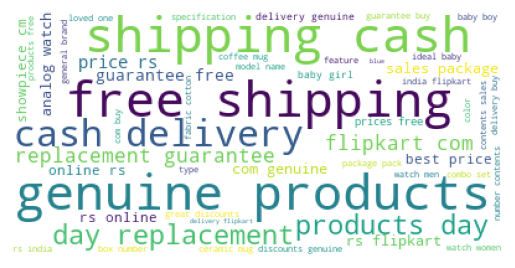

In [85]:
wordcloud = WordCloud(background_color='white',
                     stopwords=[],
                     max_words=50).generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
# The wordcloud shows that most occcurence words are not meaningfull 
# but we can see small meaningfull words like watch or baby

In [351]:
def final_clean(doc):
    
    new_doc = process_text_4(doc, 
                        list_rare_words = None,
                        extra_words = doublons_top_and_watches_top_words_moremore,
                        rejoin=True,
                        force_is_alpha=False,
                        lemm_or_stemm="lem",
                        eng_words = None)
    return new_doc

In [87]:
df['clean_text_final_eng_stem'] = df.description_with_cooking.parallel_apply(final_clean)

In [93]:
df['clean_text_final_eng_lem'] = df.description_with_cooking.parallel_apply(final_clean)

In [120]:
df['clean_text_final_all_words_lem'] = df.description_with_cooking.parallel_apply(final_clean)

In [131]:
df['clean_text_final_all_words_lem_with_no_alpha'] = df.description_with_cooking.parallel_apply(final_clean)

In [228]:
df['clean_text_final_all_words_lem_with_no_alpha_t2'] = df.description_with_cooking.parallel_apply(final_clean)

In [289]:
df['clean_text_final_all_words_lem_with_no_alpha_doublons50'] = df.description_with_cooking.parallel_apply(final_clean)

In [352]:
df['clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words_moremore'] = df.description_with_cooking.parallel_apply(final_clean)

In [89]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_eng_stem']}\n")

idx 0 : key multicolor abstract eyelet door curtain floral curtain multicolor abstract eyelet door curtain height pack curtain look interior curtain made high fabric eyelet style stitch metal ring make room environ love curtain ant anti give home bright modernist appeal design attent sure steal heart eyelet curtain slide draw apart first thing morn bright sun ray want wish good morn whole world draw close even creat special moment beauti given sooth print bring home curtain filter light room get right amount sunlight multicolor abstract eyelet door curtain height pack brand design door type eyelet model name abstract door curtain set model color multicolor length box number pack curtain design

idx 1 : cotton bath towel bath towel red yellow blue bath towel machin ye cotton design self design brand type bath towel model name cotton bath towel ideal men boy girl model color red yellow blue size length inch width inch box number bath towel

idx 2 : key cotton terri face towel set size sm

In [90]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_eng_lem']}\n")

idx 0 : key multicolor abstract eyelet door curtain floral curtain multicolor abstract eyelet door curtain height pack curtain look interior curtain made high fabric eyelet style stitch metal ring make room environ love curtain ant anti give home bright modernist appeal design attent sure steal heart eyelet curtain slide draw apart first thing morn bright sun ray want wish good morn whole world draw close even creat special moment beauti given sooth print bring home curtain filter light room get right amount sunlight multicolor abstract eyelet door curtain height pack brand design door type eyelet model name abstract door curtain set model color multicolor length box number pack curtain design

idx 1 : cotton bath towel bath towel red yellow blue bath towel machin ye cotton design self design brand type bath towel model name cotton bath towel ideal men boy girl model color red yellow blue size length inch width inch box number bath towel

idx 2 : key cotton terri face towel set size sm

In [136]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_all_words_lem_with_no_alpha']}\n")

idx 0 : key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack 899 curtain enhances look interior curtain made 100 high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model duster25 color multicolor dimension length 213 box numbe

In [91]:
list_of_nan = df[df['clean_text_final_eng_stem'] == ''].index.to_list()
df_nan = df.iloc[list_of_nan]
print(len(df.iloc[list_of_nan]))
for idx, ser in df_nan.iterrows():
    print(f"idx {idx} : {ser['description']}\n")

30
idx 194 : Buy NEHP NEH006 Showpiece  -  38.1 cm for Rs.499 online. NEHP NEH006 Showpiece  -  38.1 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 203 : Buy Purpledip Showpiece  -  12 cm for Rs.638 online. Purpledip Showpiece  -  12 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 217 : Buy RoyalsCart KTH505 Showpiece  -  33 cm for Rs.2499 online. RoyalsCart KTH505 Showpiece  -  33 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 258 : Buy Ruchikainternational ruc0015 Showpiece  -  4 cm for Rs.499 online. Ruchikainternational ruc0015 Showpiece  -  4 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 270 : Buy Mavi 237MBB Showpiece  -  15 cm for Rs.1290 online. Mavi 237MBB Showpiece  -  15 cm at best prices with FREE shipping 

In [133]:
list_of_nan = df[df['clean_text_final_eng_lem'] == ''].index.to_list()
df_nan = df.iloc[list_of_nan]
print(len(df.iloc[list_of_nan]))
for idx, ser in df_nan.iterrows():
    print(f"idx {idx} : {ser['description']}\n")

20
idx 312 : Buy Intex W150D only for Rs. 1149 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 323 : Buy Tenda TE-F452 only for Rs. 4509 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 327 : Buy Edimax BR-6428NC only for Rs. 2150 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 333 : Buy Binatone WR3000N only for Rs. 1800 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 335 : Buy Tenda A5 only for Rs. 2250 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 339 : Buy Edimax AR-7286WNA only for Rs. 2445 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 349 : Buy Tenda TE-W368R only for Rs. 1500 from Flipkart.com. Only Genuine Pro

In [134]:
df_nan = df.iloc[list_of_nan]
print(len(df.iloc[list_of_nan]))
for idx, ser in df_nan.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_all_words_lem_with_no_alpha']}\n")

20
idx 312 : intex w150d 1149

idx 323 : tenda f452 4509

idx 327 : edimax 6428nc 2150

idx 333 : binatone wr3000n 1800

idx 335 : tenda 2250

idx 339 : edimax 7286wna 2445

idx 349 : tenda w368r 1500

idx 351 : edimax 7182wna 1410

idx 352 : zyxel pla 4205 8100

idx 354 : edimax 6288acl 2840

idx 355 : tenda 1800

idx 364 : tenda fh330 1705

idx 369 : tenda 3g300m 3000

idx 380 : iball wr7011a 1333

idx 383 : netis 2301 5249

idx 391 : asus dsl n10_c1 1700

idx 403 : airtel b310s 927 2700

idx 413 : digisol bg4100n 1470

idx 419 : tenda 3g622r 3500

idx 685 : richfeel sunshield spf 269 lowest



In [142]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final']}\n")

idx 0 : key multicolor abstract eyelet door curtain floral curtain multicolor abstract eyelet door curtain height pack price curtain look interior curtain made high fabric eyelet style metal ring make room curtain anti give home bright appeal design sure eyelet curtain first bright want good whole world special print bring home curtain light room get right multicolor abstract eyelet door curtain height pack general brand designed door type eyelet model name abstract door curtain set model color multicolor dimension length box number pack curtain design

idx 1 : cotton bath towel bath towel red yellow blue bath towel cotton design self design general brand type bath towel model name cotton bath towel ideal men woman boy girl model color red yellow blue size dimension length inch width inch box number bath towel

idx 2 : key cotton face towel set size small height inch cotton face towel set face towel set assorted price designed soft cotton towel product soft care skin give bath towel br

In [151]:
print(df.loc[df['clean_text_final'].str.fullmatch("best price product", case=False)]['description'].values)

['Buy Goldencollections GC4353 Makeup and Jewellery Vanity Pouch for Rs.783 online. Goldencollections GC4353 Makeup and Jewellery Vanity Pouch at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'
 'Buy NEHP NEH006 Showpiece  -  38.1 cm for Rs.499 online. NEHP NEH006 Showpiece  -  38.1 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'
 'Buy Purpledip Showpiece  -  12 cm for Rs.638 online. Purpledip Showpiece  -  12 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'
 'Buy RoyalsCart KTH505 Showpiece  -  33 cm for Rs.2499 online. RoyalsCart KTH505 Showpiece  -  33 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'
 'Buy Kosher Kadhai 5 L for Rs.592 online. Kosher Kadhai 5 L at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day 

In [290]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_translated']}\n")

idx 0 : key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack price curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model color multicolor dimens length box number content sale packag pack sale packag curtain bodi design materi polyest

idx 1 : specif sathiya cotton bat

In [298]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_translated']}\n")

idx 0 : key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack price curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model color multicolor dimens length box number content sale packag pack sale packag curtain bodi design materi polyest

idx 1 : specif sathiya cotton bat

In [ ]:
# Some descriptions are not meaningfull anymore, 
# thus, either we trimmed too much or the original description is not consistent.
# In this case it results from the fact that some product descriptions have meaningfull words written in Indian

In [144]:
raw_c = df.clean_text_final.values

tmp = pd.Series(raw_c).value_counts().head(50)
tmp

best price product                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         30
product                                                                                                                                                                                                                                                                                                                                                                   

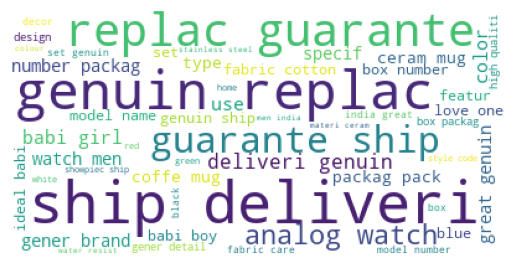

In [313]:
corpus = process_text_4(raw_corpus, 
                        list_rare_words = list_5_words_and_less,
                        extra_words = custom_list,
                        rejoin=True,
                        lemm_or_stemm="stem",
                        eng_words = eng_words_stem)

wordcloud = WordCloud(background_color='white',
                     stopwords=[],
                     max_words=50).generate(corpus)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
# We can see that the words are more meaningfull but there are still consistent words that are not

In [82]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final']}\n")

idx 0 : key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model color multicolor dimens length box number packag pack packag curtain bodi design materi polyest

idx 1 : specif sathiya cotton bath towel bath towel red y

In [170]:
df_nan = df.iloc[list_of_nan]
print(len(df.iloc[list_of_nan]))
for idx, ser in df_nan.iterrows():
    print(f"idx {idx} : {ser['product_url']}\n")

59
idx 100 : http://www.flipkart.com/goldencollections-gc4353-makeup-jewellery-vanity-pouch/p/itmeb97u3ehqzjgn?pid=VANEB97UCYGMNHRY

idx 194 : http://www.flipkart.com/nehp-neh006-showpiece-38-1-cm/p/itmefffpjnuekrev?pid=SHIEFFFPMFH8SZZM

idx 203 : http://www.flipkart.com/purpledip-showpiece-12-cm/p/itmdyzaym5yv3uwf?pid=SHIDYZAYRM4KKJGR

idx 217 : http://www.flipkart.com/royalscart-kth505-showpiece-33-cm/p/itme8c5ntxcgfbxe?pid=SHIE8C5NBQV5QWCH

idx 240 : http://www.flipkart.com/kosher-kadhai-5-l/p/itmeanchqcutgx3m?pid=PTPEANCHNPTDUUQK

idx 241 : http://www.flipkart.com/recon-superchef-kadhai/p/itme6nzafrhprgkd?pid=PTPE6NZAWWHNJHJ4

idx 243 : http://www.flipkart.com/suruchi-kadhai-4-5-l/p/itmefjhgpxzzvqdz?pid=PTPEFJHGGFH7GA3Q

idx 245 : http://www.flipkart.com/kalash-kadhai-11-5-l/p/itme62xbycdzrzpz?pid=PTPE62XBRHPBQDZS

idx 247 : http://www.flipkart.com/leo-natura-paniarakkal-7-hole-kadhai-na-l/p/itmeycf7sv957kbz?pid=PTPEYCF7GZU2T54E

idx 248 : http://www.flipkart.com/malhar-niko-male-d

In [409]:
df_nan = df.iloc[list_of_nan]
print(len(df.iloc[list_of_nan]))
for idx, ser in df_nan.iterrows():
    print(f"idx {idx} : {ser['description']}\n")

59
idx 100 : Buy Goldencollections GC4353 Makeup and Jewellery Vanity Pouch for Rs.783 online. Goldencollections GC4353 Makeup and Jewellery Vanity Pouch at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 194 : Buy NEHP NEH006 Showpiece  -  38.1 cm for Rs.499 online. NEHP NEH006 Showpiece  -  38.1 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 203 : Buy Purpledip Showpiece  -  12 cm for Rs.638 online. Purpledip Showpiece  -  12 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 217 : Buy RoyalsCart KTH505 Showpiece  -  33 cm for Rs.2499 online. RoyalsCart KTH505 Showpiece  -  33 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.

idx 240 : Buy Kosher Kadhai 5 L for Rs.592 online. Kosher Kadhai 5 L at best prices with FREE shipping & cash 

In [408]:
list_of_no_meaning = df[df['clean_text_final_stem_5_kadhai_translated'] == 'genuin replac guarante ship deliveri'].index.to_list()
df_no_means = df.iloc[list_of_no_meaning]
print(len(df.iloc[list_of_no_meaning]))
for idx, ser in df_no_means.iterrows():
    print(f"idx {idx} : {ser['description']}\n")

24
idx 312 : Buy Intex W150D only for Rs. 1149 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 323 : Buy Tenda TE-F452 only for Rs. 4509 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 326 : Buy TRENDnet TEW-752DRU only for Rs. 5199 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 327 : Buy Edimax BR-6428NC only for Rs. 2150 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 333 : Buy Binatone WR3000N only for Rs. 1800 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 335 : Buy Tenda A5 only for Rs. 2250 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

idx 339 : Buy Edimax AR-7286WNA only for Rs. 2445 from Flipkart.com. Only Genuin

In [292]:
list_of_nan_stem = df[df['clean_text_final_all_words_lem_with_no_alpha_doublons50'] == ''].index.to_list()
df_nan_stem = df.iloc[list_of_nan_stem]
print(len(df.iloc[list_of_nan_stem]))
for idx, ser in df_nan_stem.iterrows():
    print(f"idx {idx} : {ser['description']}\n")

0


In [307]:
list_of_nan_stem = df[df['clean_text_final_stem_10_kadhai_translated'] == ''].index.to_list()
list_of_nan_stem

[]

In [437]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_stem_5_kadhai_translated']}\n")

idx 0 : key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style metal ring make room curtain anti eleg give home bright appeal design sure contemporari eyelet curtain first morn bright want good morn whole world creat special beauti print bring home eleg curtain light room get right specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model color multicolor dimens length box number packag pack packag curtain bodi design materi polyest

idx 1 : specif cotton bath towel bath towel red yellow blue bath towel featur machin washabl ye materi cotton design self design gener brand type bath towel model name cotton bath towel ideal men boy girl model color red yellow blue size dimens length inch width inch box numbe

In [ ]:
def create_list_translated(doc):
    
    hindi_list = []
        
    #lower
    doc = doc.lower().strip()
    
    #tokenize : split a string into substrings using a regular expression
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    for token in raw_tokens_list:
        result_lang = detect(token)
        if result_lang == 'hi':
            hindi_list.append(token)
            
    return hindi_list

In [199]:
df.clean_text_final.head()

0    key multicolor abstract eyelet door curtain fl...
1    cotton bath towel bath towel red yellow blue b...
2    key cotton face towel set size small height in...
3    key royal fashion cotton king royal wedding ro...
4    key print cotton floral king cotton print cott...
Name: clean_text_final, dtype: object

In [317]:
# check if some description are empty
df.value_Second_translated.isna().sum()

0

In [273]:
# check with the freq if the most description is not based on non meaningfull words
df.describe(include=object)

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   

                                              product_url  \
count                                                1050   
unique                                               1050   
top     http://www.flipkart.com/elegance-polyester-mul...   
freq                                                    1   

                                             product_name  \
count                                                1050   
unique                                               1050   
top     Elegance Polyester Multicolor Abstract Eyelet ...   
freq                                                    1   

                                    product_category_tree               pid  \
count                                                1050              1050   
unique                                                642              1050   
top     ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z   
freq                                                   56                 1   

                                       image  \
count                                   1050   
unique                                  1050   
top     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq                                       1   

                                              description  \
count                                                1050   
unique                                               1050   
top     Key Features of Elegance Polyester Multicolor ...   
freq                                                    1   

             product_rating       overall_rating         brand  \
count                  1050                 1050           712   
unique                   27                   27           490   
top     No rating available  No rating available  PRINT SHAPES   
freq                    889                  889            11   

                                   product_specifications  \
count                                                1049   
unique                                                984   
top     {"product_specification"=>[{"key"=>"Type", "va...   
freq                                                   22   

                                                 value_en clean_text_final  \
count                                                1050             1050   
unique                                               1050              830   
top     Key Features of Elegance Polyester Multicolor ...                    
freq                                                    1               59   

                              clean_text_final_translated      product_cat  
count                                                1050             1050  
unique                                                982                7  
top     printland ceram mug price printland coffe mug ...  Home Furnishing  
freq                                                   12              150

In [98]:
df = df.assign(product_cat = lambda x: x['product_category_tree'])

# if necessary to strip for better manipulation
# for row in range(0,len(df['product_cat'])):
    # df['product_cat'][row] = df.product_category_tree[row].strip('"]["')

df['product_cat'] = df['product_cat'].apply(lambda x: 'Home, Decor, & Festive Needs' if 'Home Decor & Festive Needs >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Baby Care' if 'Baby Care >> ' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Home Furnishing' if 'Home Furnishing >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Kitchen & Dining' if 'Kitchen & Dining >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Computers' if 'Computers >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Watches' if 'Watches >>' in x else x)
df['product_cat'] = df['product_cat'].apply(lambda x: 'Beauty and Personal Care' if 'Beauty and Personal Care >>' in x else x)

df['product_cat'].value_counts()

Home Furnishing                 150
Baby Care                       150
Watches                         150
Home, Decor, & Festive Needs    150
Kitchen & Dining                150
Beauty and Personal Care        150
Computers                       150
Name: product_cat, dtype: int64

In [237]:
df.clean_text_final.isna().sum()

0

In [238]:
df_clean = df.loc[:,['clean_text_final','clean_text_final_stem','description','product_cat','image']]
df_clean.to_csv('df_cleantext_and_description_prod.csv')
df_clean.clean_text_final.isna().sum()

0

In [277]:
df_clean.head(50)

clean_text_final  \
0   key multicolor abstract eyelet door curtain fl...   
1   cotton bath towel bath towel red yellow blue b...   
2   key cotton face towel set size small height in...   
3   key royal fashion cotton king royal wedding ro...   
4   key print cotton floral king cotton print cott...   
5   time analog watch boy time analog watch boy in...   
6   analog watch men boy analog watch men boy indi...   
7   analog watch boy way work like watch help add ...   
8   watch men boy watch men boy india time around ...   
9   analog watch boy men analog watch boy men indi...   
10  analog watch men boy black dial round watch wa...   
11  analog watch boy men analog watch boy men indi...   
12  analog watch boy men analog watch boy men indi...   
13  analog watch boy men analog watch boy men indi...   
14  art watch men woman boy girl art watch men wom...   
15  analog watch men boy style black analog watch ...   
16                    watch boy watch boy india great   
17  watch boy girl woman watch boy girl woman indi...   
18  analog watch boy men analog watch boy men indi...   
19                    watch boy watch boy india great   
20  dark sport analog watch men boy dark sport ana...   
21  ethnic analog watch boy ethnic analog watch bo...   
22  analog watch boy men analog watch boy men indi...   
23  red sport watch men boy red sport watch men bo...   
24  analog watch men boy analog watch men boy indi...   
25  watch men boy girl watch men boy girl india li...   
26  analog watch boy girl analog watch boy girl in...   
27                    watch boy watch boy india great   
28  sport watch boy girl brand sport watch kid yea...   
29  analog watch boy men analog watch boy men indi...   
30  watch boy girl watch boy girl india clasp colo...   
31  analog watch men boy analog watch men boy indi...   
32  analog watch men boy analog watch men boy indi...   
33  key royal fashion cotton set color multicolor ...   
34  key queen cotton duvet cover cotton inner dime...   
35                       cotton bath mat classic loop   
36  pot liquid air every corner living room style ...   
37  key india craft jug glass set jug height inch ...   
38  key led bulb pack bulb led bulb white new led ...   
39  key cushion cover size made cotton cushion cov...   
40  key kid girl green top pyjama set fabric cotto...   
41  key cushion cover length width cushion cover p...   
42  key kid girl blue grey top pyjama set fabric c...   
43  key hair repair deep ideal boy girl deep hair ...   
44  key mug pack mug mug mug give mug gift one goo...   
45  key love mug pack mug love mug mug give mug gi...   
46  key keep mug pack mug keep mug mug give mug gi...   
47  key link android link white speed wireless spe...   
48  key mug pack mug mug mug give mug gift one goo...   
49  key ideal boy girl hair condition hair hair ty...   

                          clean_text_final_translated  \
0   key featur eleg polyest multicolor abstract ey...   
1   specif sathiya cotton bath towel bath towel re...   
2   key featur eurospa cotton terri face towel set...   
3   key featur santosh royal fashion cotton print ...   
4   key featur jaipur print cotton floral king siz...   
5   maserati time analog watch boy buy maserati ti...   
6   camerii eleg analog watch men boy buy camerii ...   
7   star uft tsw analog watch boy price whether wa...   
8   alfajr youth digit watch men boy buy alfajr yo...   
9   tag heuer formula analog watch boy men buy tag...   
10  calibro analog digit watch men boy price calib...   
11  cartier analog watch boy men buy cartier analo...   
12  loi caron lc analog watch boy men buy loi caro...   
13  titan analog watch boy men buy titan analog wa...   
14  srushti art jewelri digit watch men women boy ...   
15  escort analog watch men boy price flaunt mantr...   
16  jack klein blackl digit watch boy buy jack kle...   
17  north moon silicon ion digit watch boy girl wo...   
18  franck bella analog watch boy men buy fran

<Axes: title={'center': 'Proportion de NaN par variable (%)'}>

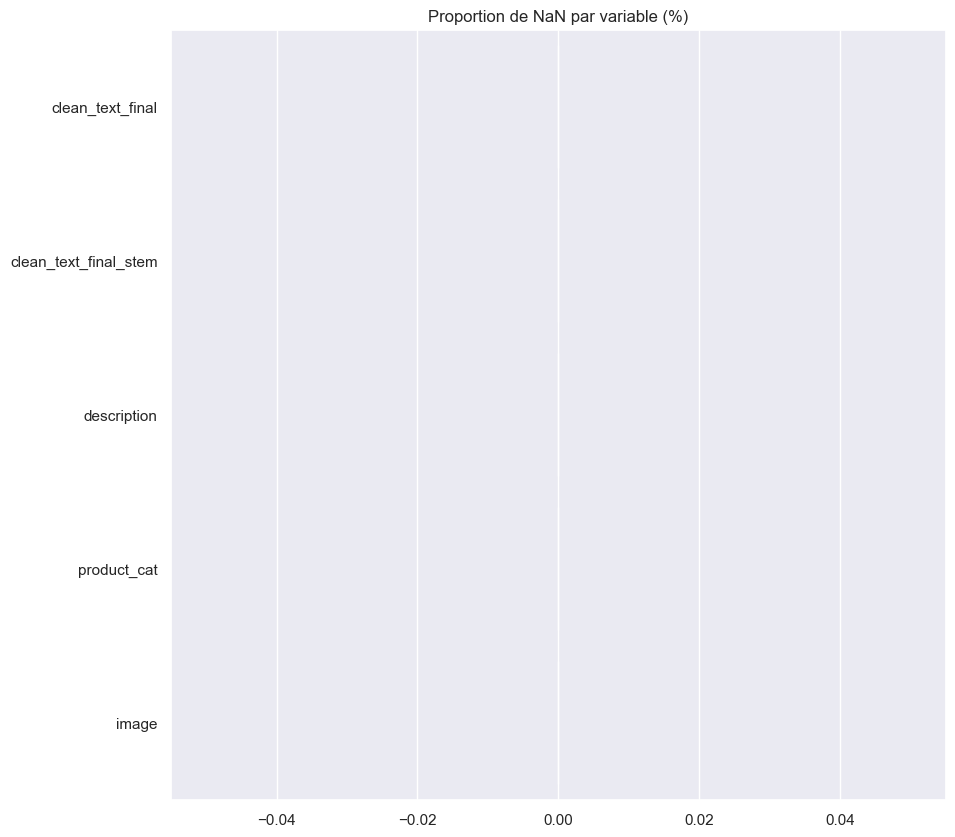

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
data_nan = df_clean.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.title("Proportion de NaN par variable (%)")
sns.barplot(x=data_nan.values / df_clean.shape[0] * 100, y=data_nan.index)

In [281]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clean_text_final             1050 non-null   object
 1   clean_text_final_translated  1050 non-null   object
 2   description                  1050 non-null   object
 3   product_cat                  1050 non-null   object
 4   image                        1050 non-null   object
dtypes: object(5)
memory usage: 41.1+ KB


In [77]:
df.loc[df['uniq_id'].str.contains("009", case=False)]

In [438]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['description']}\n")

idx 0 : key features of elegance polyester multicolor abstract eyelet door curtain floral curtain,elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so t

In [70]:
df.loc[:,['clean_text_final','product_cat','uniq_id']].isna().sum()

clean_text_final    0
product_cat         0
uniq_id             0
dtype: int64

In [261]:
list_of_nan_stem = df[df['clean_text_final_stem_customl'] == ''].index.to_list()
list_of_nan_stem

[]

In [356]:
for idx, ser in df.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words_moremore']}\n")

idx 0 : elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height 899 curtain enhances look interior curtain 100 high polyester fabric eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight elegance polyester multicolor abstract eyelet door curtain 213 height elegance designed door eyelet model name abstract polyester door curtain model duster25 multicolor dimension length 213 box content curtain body polyester

idx 1 : sathiyas bath towel bath towel red yellow blue bath towel 

In [184]:
detect('Kaatru Surya Bhagavan')

'id'

In [293]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', '_len_text',
       'description_with_cooking', 'clean_text_final_eng_stem',
       'clean_text_final_eng_lem', 'product_cat',
       'clean_text_final_all_words_lem',
       'clean_text_final_all_words_lem_with_no_alpha',
       'clean_text_final_all_words_lem_with_no_alpha_doublons10',
       'clean_text_final_all_words_lem_with_no_alpha_doublons10_l5',
       'clean_text_final_all_words_lem_with_no_alpha_t2',
       'clean_text_final_all_words_lem_with_no_alpha_doublons10_freq2',
       'clean_text_final_all_words_lem_with_no_alpha_doublons20',
       'clean_text_final_all_words_lem_with_no_alpha_doublons30',
       'clean_text_final_all_words_lem_with_no_alpha_doublons50'],
      dtype='object')

In [324]:
df_watches_iter = pd.DataFrame(df.loc[df.product_cat == 'Watches','clean_text_final_all_words_lem_with_no_alpha_doublons10_and_top_words'])
df_watches_iter

clean_text_final_all_words_lem_with_no_alpha_doublons10_and_top_words
5    maserati time r8851116001 analog watch boy buy...                   
6    camerii wm64 elegance analog watch men boy buy...                   
7    star uft tsw 005 analog watch boy price 399 wh...                   
8    alfajr wy16b youth digital watch men boy buy a...                   
9    tag heuer cau1116 ba0858 formula analog watch ...                   
..                                                 ...                   
796  g16 analog watch men buy g16 analog watch men ...                   
823  firstrace 101 107 analog watch couple buy firs...                   
825  fashion 108 121 analog watch woman buy fashion...                   
826  timex ti000i70600 analog watch men buy timex t...                   
913  like analog purple clock function alarm yes ge...                   

[150 rows x 1 columns]

In [355]:
for idx, ser in df_watches_iter.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_all_words_lem_with_no_alpha_doublons10_and_top_words']}\n")

idx 5 : maserati time r8851116001 analog watch boy buy maserati time r8851116001 analog watch boy r8851116001 online 24400 india flipkart com great discount genuine product day

idx 6 : camerii wm64 elegance analog watch men boy buy camerii wm64 elegance analog watch men boy wm64 online 449 india flipkart com great discount genuine product day

idx 7 : star uft tsw 005 analog watch boy price 399 whether way work travelling abroad family lifestyle accessory like watch wallet belt help add touch sophistication class otherwise mundane regular daily wear come suave leather belt intricately designed finished timepiece separate rest whether way work travelling abroad family lifestyle accessory like watch wallet belt help add touch sophistication class otherwise mundane regular daily wear come suave leather belt intricately designed finished timepiece separate rest

idx 8 : alfajr wy16b youth digital watch men boy buy alfajr wy16b youth digital watch men boy wy16b online 4995 india flipkart c

In [306]:
df_beauty_iter = pd.DataFrame(df.loc[df.product_cat == 'Beauty and Personal Care','clean_text_final_all_words_lem_with_no_alpha_doublons50'])
for idx, ser in df_beauty_iter.iterrows():
    print(f"idx {idx} : {ser['clean_text_final_all_words_lem_with_no_alpha_doublons50']}\n")

idx 43 : burt bee hair repair shea grapefruit deep conditioner applied deep conditioning hair condition damaged hair hair dry hair burt bee hair repair shea grapefruit deep conditioner 147 conditioner trait hair condition damaged hair hair dry hair applied deep conditioning trait burt bee quantity 147 name hair repair shea grapefruit deep conditioner conditioner

idx 49 : suave natural everlasting sunshine conditioner applied conditioning hair condition damaged hair hair dry hair suave natural everlasting sunshine conditioner 665 conditioner trait hair condition damaged hair hair dry hair applied conditioning trait suave quantity 665 name natural everlasting sunshine conditioner conditioner

idx 56 : buy borse n16 make jewellery vanity case 680 online borse n16 make jewellery vanity case best price free shipping cash delivery genuine product day replacement guarantee

idx 57 : rythmx nail polish black lipstick important combo combo detail content combo combo content nail polish lipstic

In [294]:
df.loc[df.product_cat == 'Watches','clean_text_final_all_words_lem_with_no_alpha_doublons50']

5      maserati time r8851116001 analog watch buy mas...
6      camerii wm64 elegance analog watch buy camerii...
7      star uft tsw 005 analog watch price 399 whethe...
8      alfajr wy16b youth digital watch buy alfajr wy...
9      tag heuer cau1116 ba0858 formula analog watch ...
                             ...                        
796    g16 analog watch buy g16 analog watch g16 onli...
823    firstrace 101 107 analog watch couple buy firs...
825    fashion 108 121 analog watch buy fashion 108 1...
826    timex ti000i70600 analog watch buy timex ti000...
913    like analog purple clock function alarm yes su...
Name: clean_text_final_all_words_lem_with_no_alpha_doublons50, Length: 150, dtype: object

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

In [ ]:
top_n_bigrams=get_top_ngram(df['clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words'],1)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
top_n_bigrams=get_top_ngram(df['clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

# Transformation <a class="anchor" id='chapter4'></a>

# Bag of word - Tf-idf <a class="anchor" id='section_2_1' ></a>

In [102]:
#Bag of words

#transformation du comptage : recuperation de la frequence de chaque mot => matrice
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(df.clean_text_final)
#max_ features  = nombre de mot qu'on va mettre dans notre vocabulaire

AttributeError: 'DataFrame' object has no attribute 'clean_text_final'

In [82]:
# encode document
vector = vectorizer.transform(df.clean_text_final)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1050, 682)
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [105]:
# Import des librairies

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

In [87]:
#regroupage des labels

l_cat = list(set(df['product_cat']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df.iloc[i]['product_cat'])) for i in range(len(df))]

catégories :  ['Home Furnishing', 'Watches', 'Kitchen & Dining', 'Beauty and Personal Care', 'Computers', 'Baby Care', 'Home, Decor, & Festive Needs']


In [88]:
# fonction pour ARI et visualisation

def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [117]:
# fonction pour ARI et visualisation

def ARI_fct(tokens) :
    
    #regroupage des labels

    l_cat = list(set(df['product_cat']))
    y_cat_num = [(1-l_cat.index(df.iloc[i]['product_cat'])) for i in range(len(df))]

    cvect = CountVectorizer(max_df=0.95, min_df=1)
    ctf = TfidfVectorizer(max_df=0.95, min_df=1)

    cv_fit = cvect.fit(df[tokens])
    ctf_fit = ctf.fit(df[tokens])

    cv_transform = cvect.transform(df[tokens])  
    ctf_transform = ctf.transform(df[tokens])
    
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X1_tsne = tsne.fit_transform(cv_transform)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X1_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    
    time2_1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X2_tsne = tsne.fit_transform(ctf_transform)
    
    cls2 = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls2.fit(X2_tsne)
    ARI2 = np.round(metrics.adjusted_rand_score(y_cat_num, cls2.labels_),4)
    time2_2 = np.round(time.time() - time2_1,0)
    
    #print("ARI : ", ARI, "time : ", time2)
    
    print("CountVectorizer : ")
    print("-----------------")
    print("ARI : ", ARI, "time : ", time2)
    #ARI, X_tsne, labels = ARI_fct(cv_transform)
    print()
    print("Tf-idf : ")
    print("--------")
    print("ARI : ", ARI2, "time : ", time2_2)
    #ARI2, X2_tsne, labels = ARI_fct(ctf_transform)

    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X2_tsne[:,0],X2_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X2_tsne[:,0],X2_tsne[:,1], c=cls2.labels_, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(cls2.labels_), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI2)

CountVectorizer : 
-----------------
ARI :  0.4185 time :  6.0

Tf-idf : 
--------
ARI :  0.3268 time :  5.0


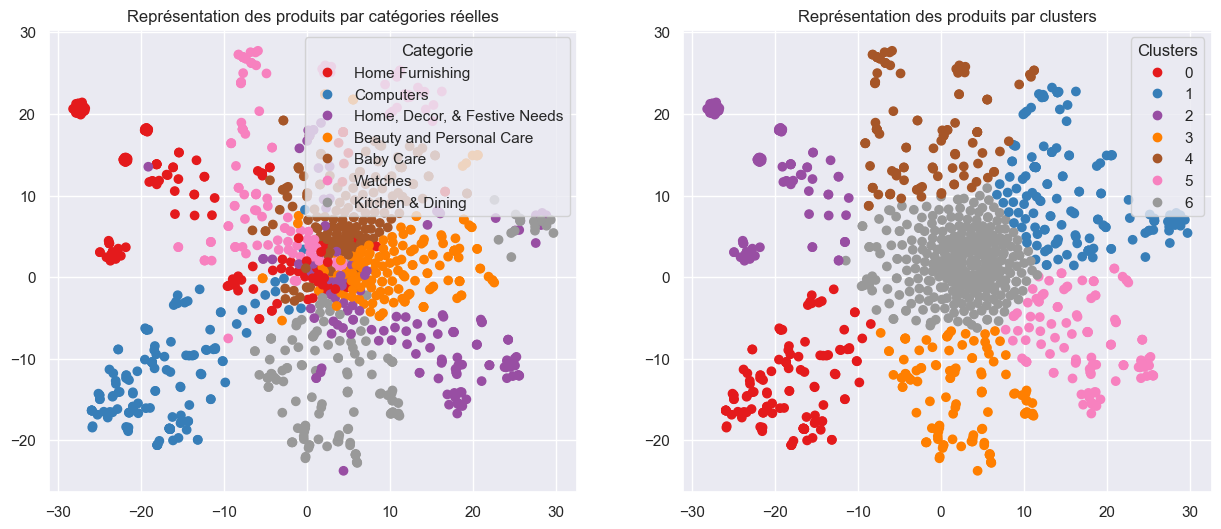

ARI :  0.3268


In [118]:
ARI_fct('clean_text_final_eng_lem')

CountVectorizer : 
-----------------
ARI :  0.4048 time :  6.0

Tf-idf : 
--------
ARI :  0.4995 time :  5.0


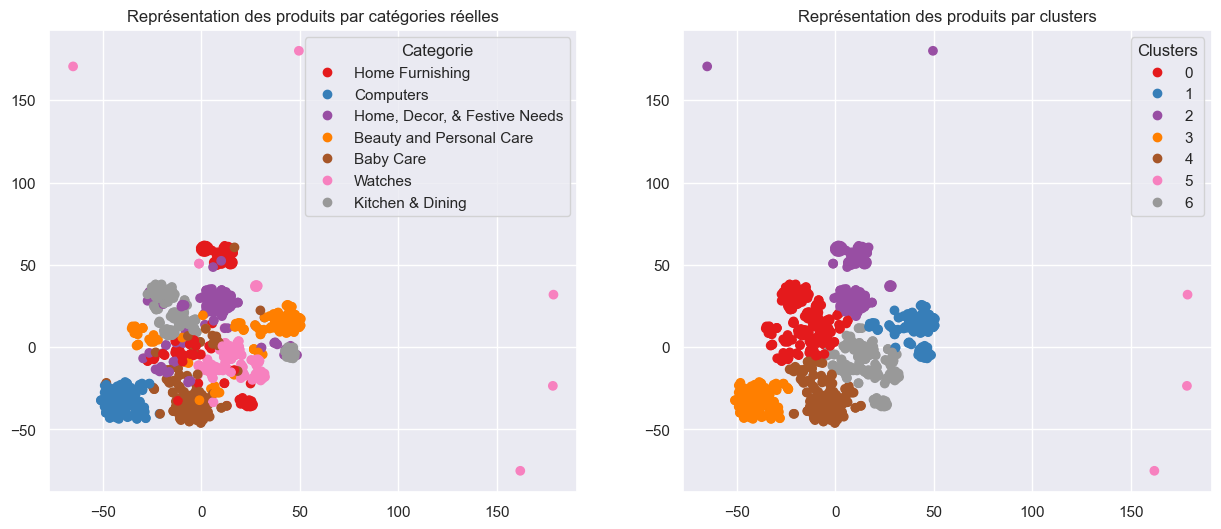

ARI :  0.4995


In [121]:
ARI_fct('clean_text_final_all_words_lem')

CountVectorizer : 
-----------------
ARI :  0.3697 time :  6.0

Tf-idf : 
--------
ARI :  0.5722 time :  5.0


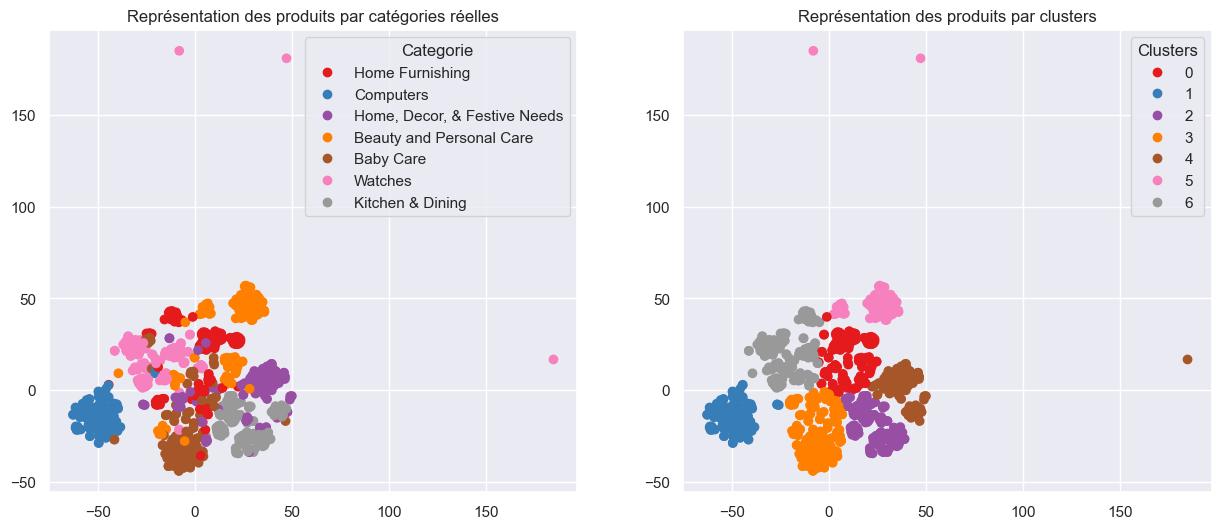

ARI :  0.5722


In [216]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha')

CountVectorizer : 
-----------------
ARI :  0.3697 time :  6.0

Tf-idf : 
--------
ARI :  0.5722 time :  5.0


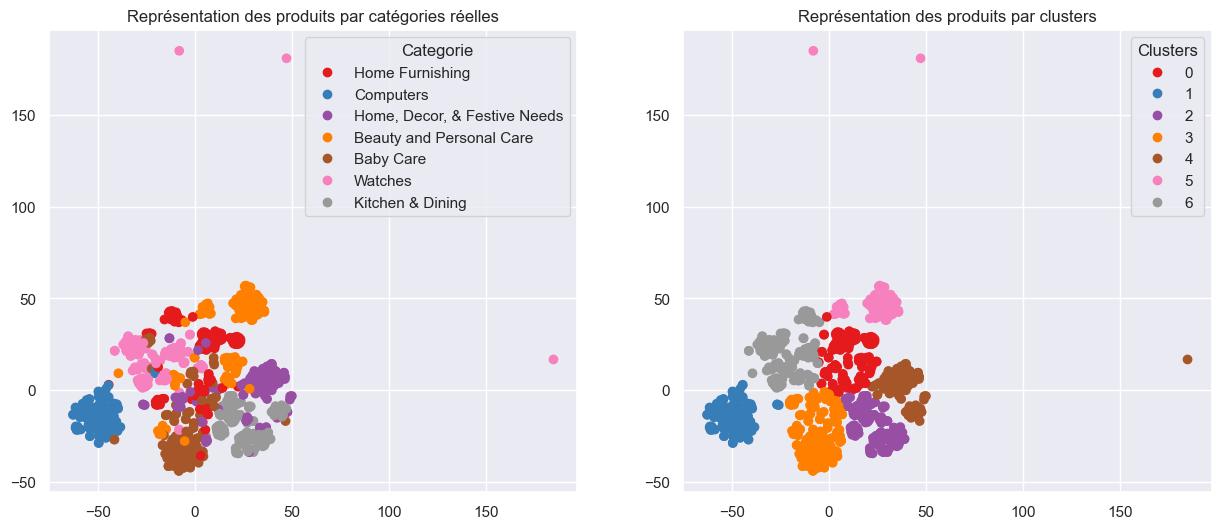

ARI :  0.5722


In [229]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_t2')

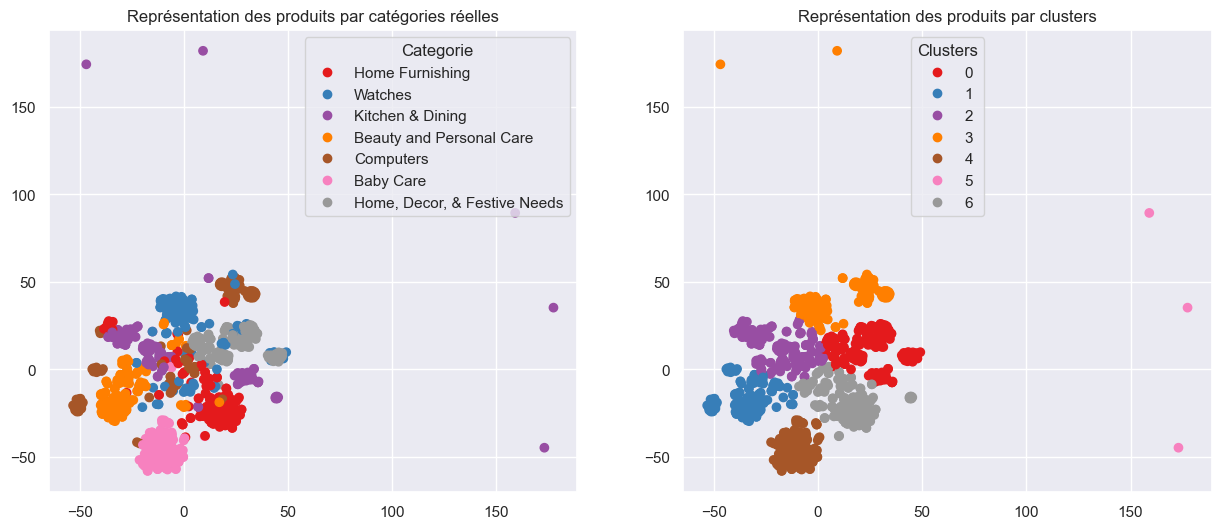

ARI :  0.5113


In [150]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

CountVectorizer : 
-----------------
ARI :  0.3977 time :  5.0

Tf-idf : 
--------
ARI :  0.5898 time :  6.0


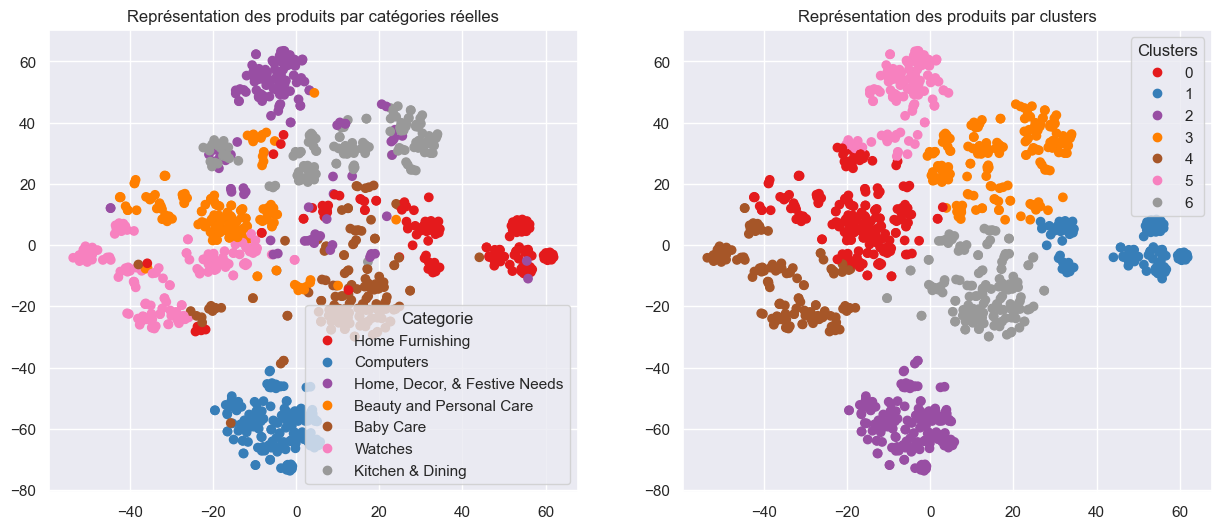

ARI :  0.5898


In [246]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons10')

CountVectorizer : 
-----------------
ARI :  0.3973 time :  6.0

Tf-idf : 
--------
ARI :  0.5125 time :  5.0


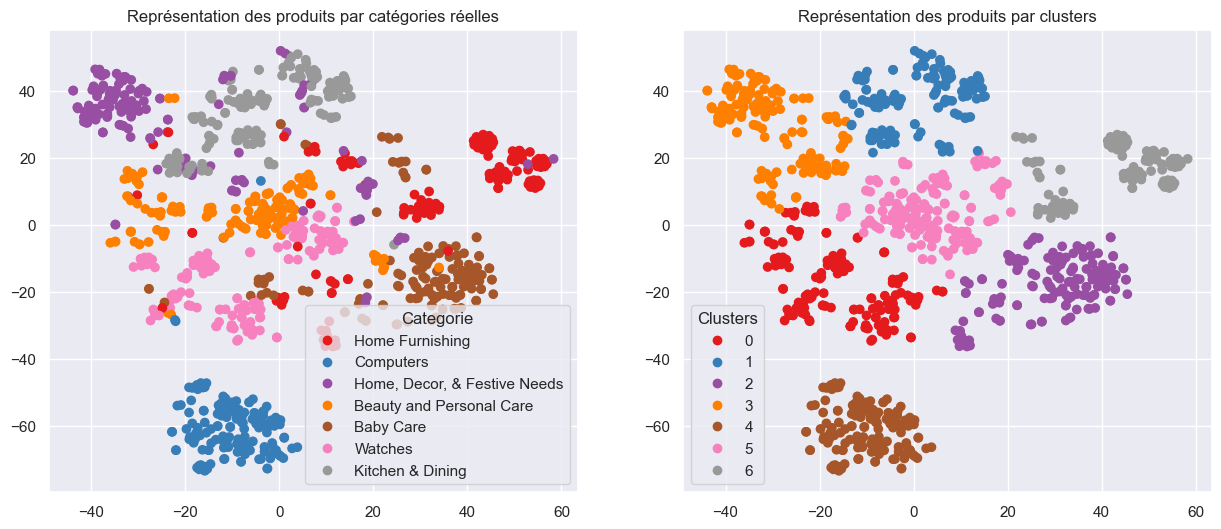

ARI :  0.5125


In [250]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons10_freq2')

CountVectorizer : 
-----------------
ARI :  0.394 time :  5.0

Tf-idf : 
--------
ARI :  0.5827 time :  5.0


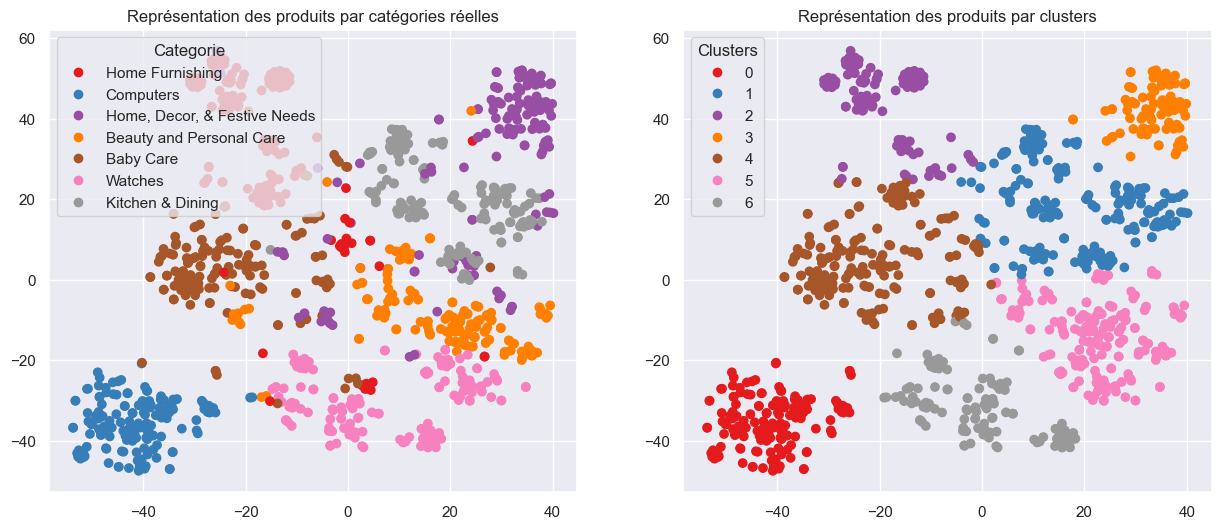

ARI :  0.5827


In [263]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons20')

CountVectorizer : 
-----------------
ARI :  0.3803 time :  5.0

Tf-idf : 
--------
ARI :  0.5331 time :  5.0


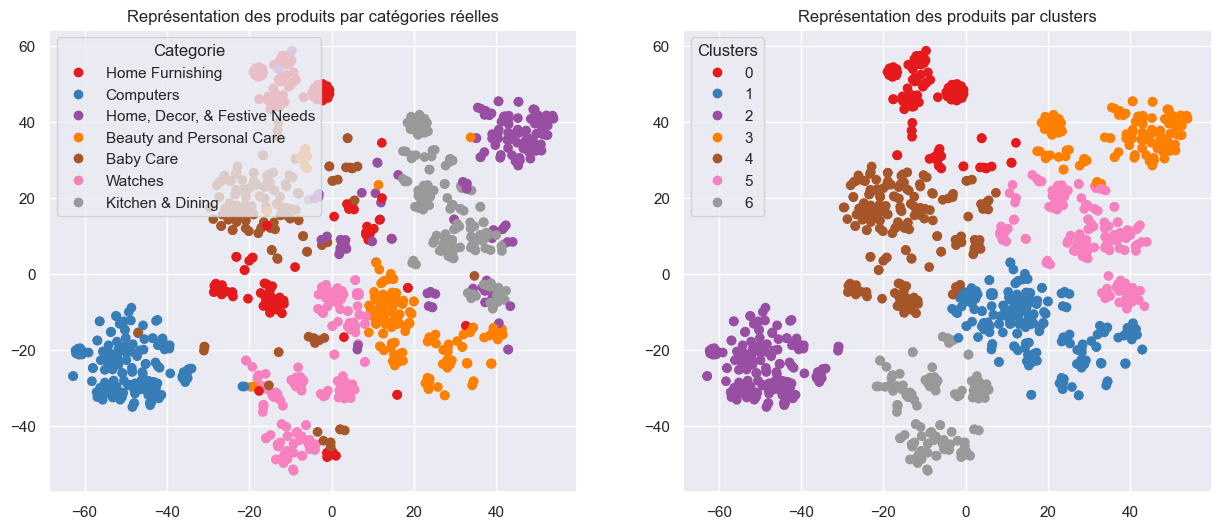

ARI :  0.5331


In [277]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons30')

CountVectorizer : 
-----------------
ARI :  0.3165 time :  5.0

Tf-idf : 
--------
ARI :  0.5214 time :  9.0


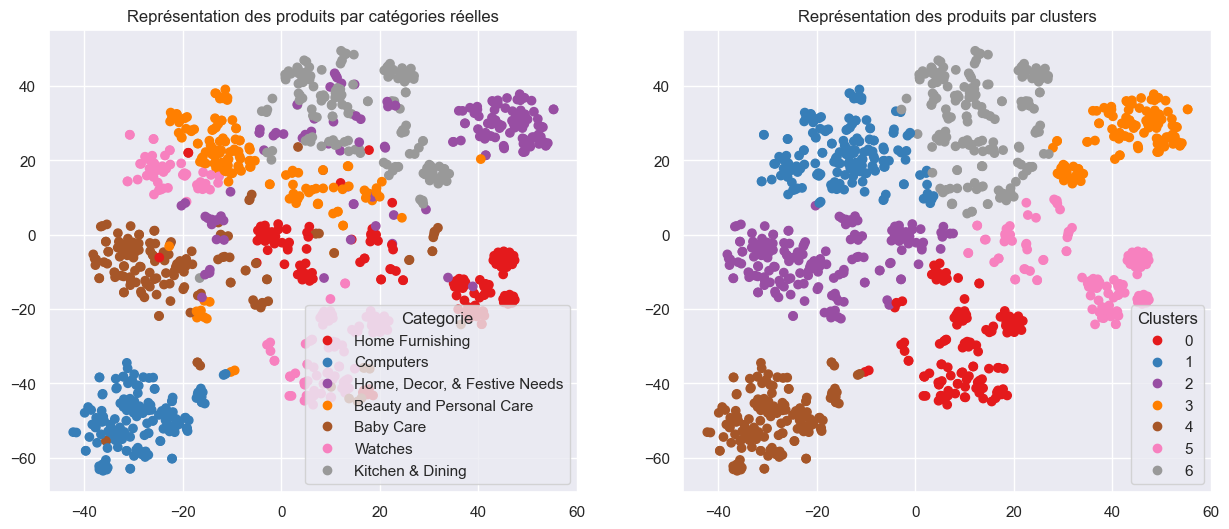

ARI :  0.5214


In [290]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons50')

CountVectorizer : 
-----------------
ARI :  0.4416 time :  6.0

Tf-idf : 
--------
ARI :  0.5315 time :  5.0


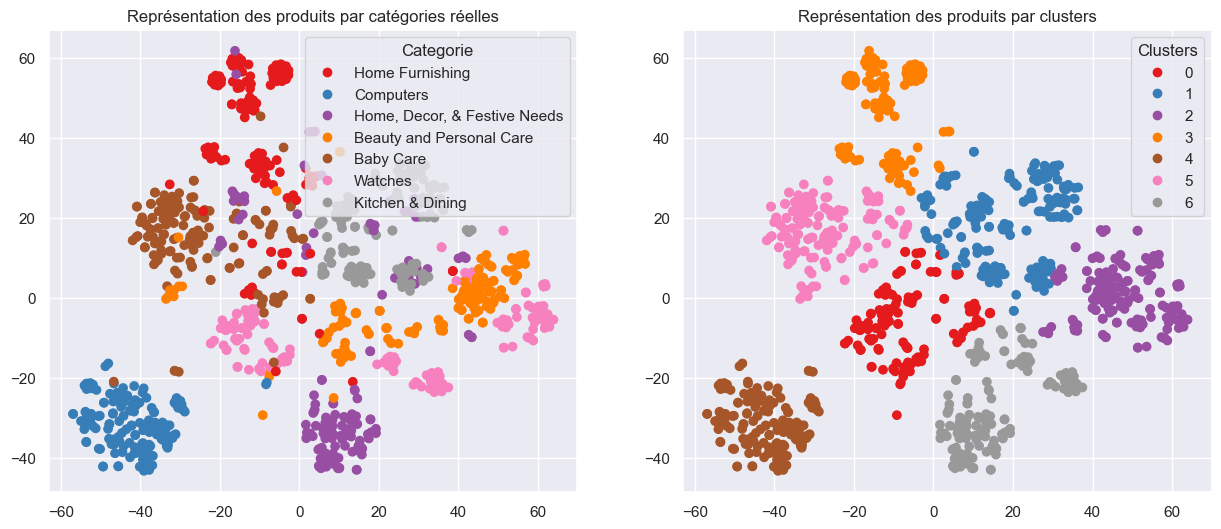

ARI :  0.5315


In [322]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons10_and_top_words')

CountVectorizer : 
-----------------
ARI :  0.3632 time :  6.0

Tf-idf : 
--------
ARI :  0.4803 time :  5.0


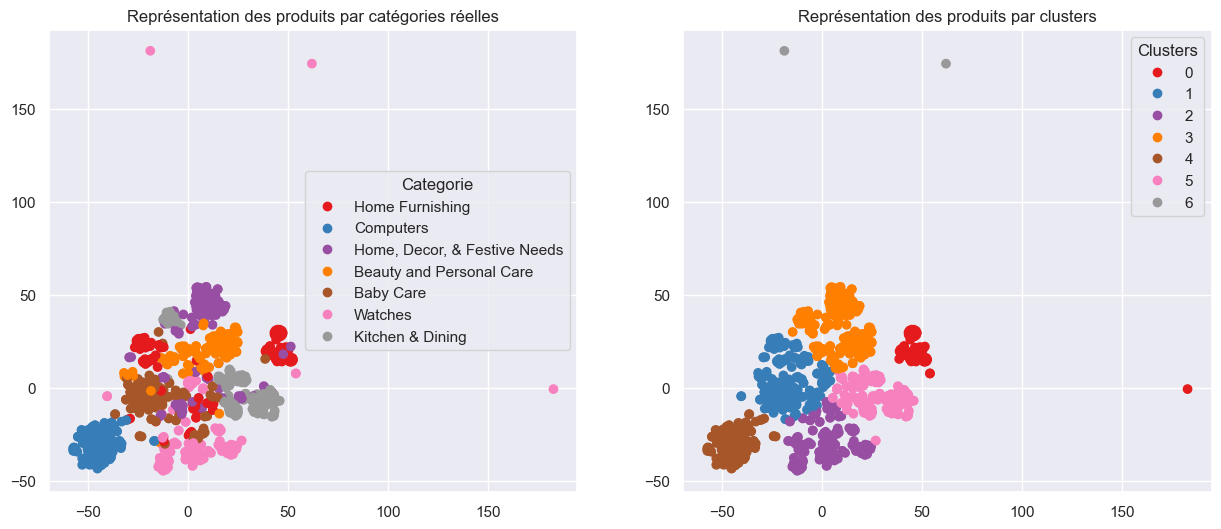

ARI :  0.4803


In [331]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words')

CountVectorizer : 
-----------------
ARI :  0.3602 time :  6.0

Tf-idf : 
--------
ARI :  0.5783 time :  6.0


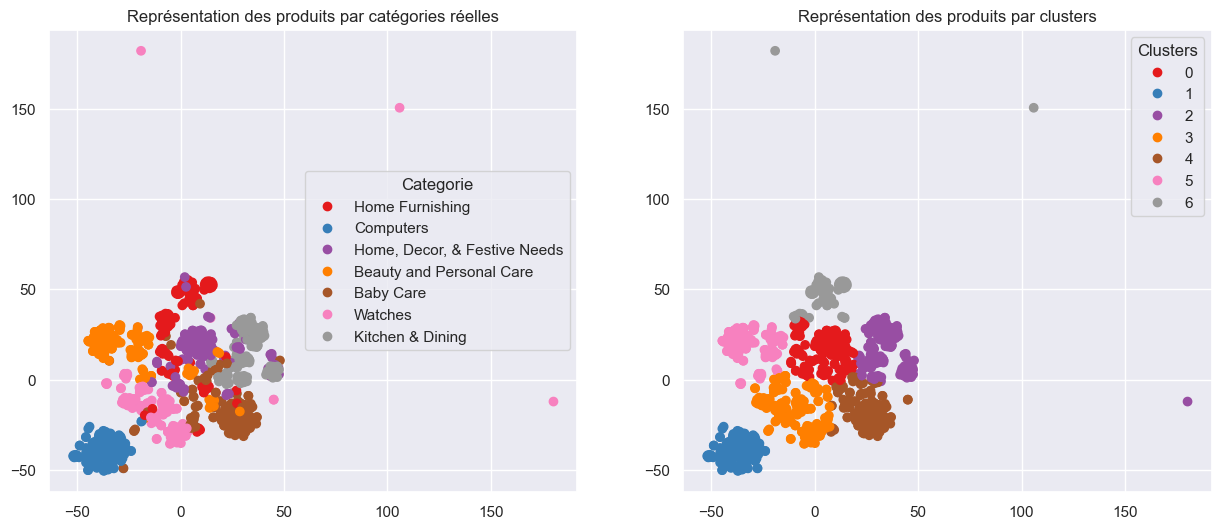

ARI :  0.5783


In [336]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words')

CountVectorizer : 
-----------------
ARI :  0.3371 time :  5.0

Tf-idf : 
--------
ARI :  0.5674 time :  5.0


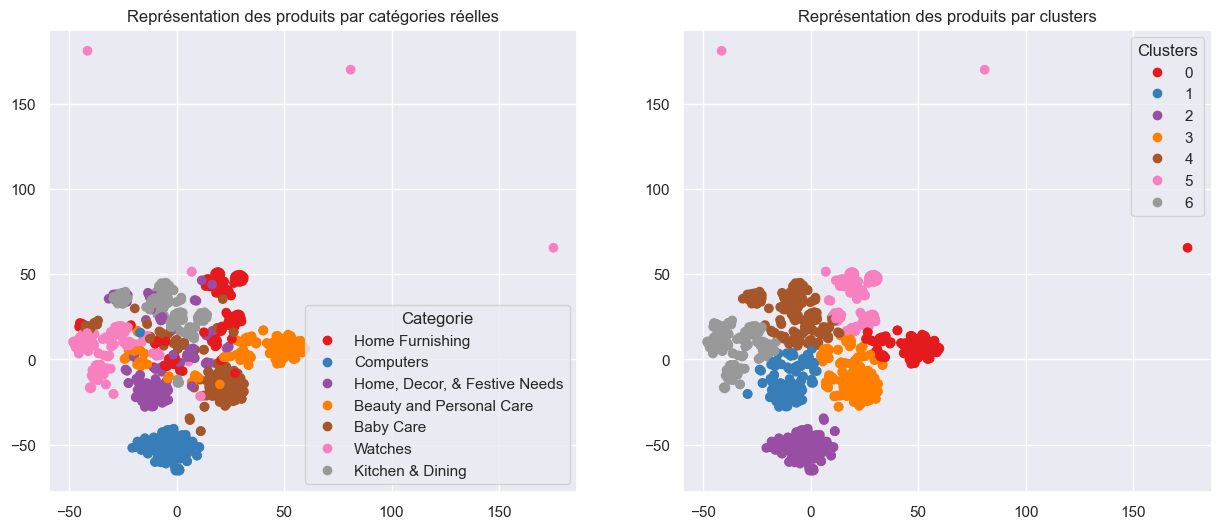

ARI :  0.5674


In [344]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words_more')

CountVectorizer : 
-----------------
ARI :  0.3769 time :  7.0

Tf-idf : 
--------
ARI :  0.5141 time :  7.0


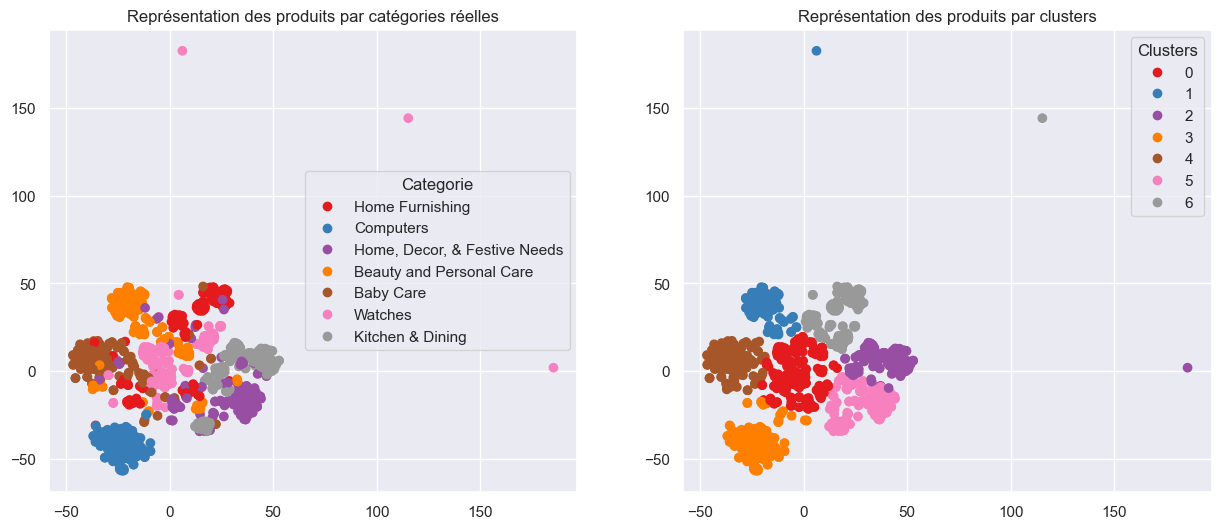

ARI :  0.5141


In [353]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons_top_and_watches_top_words_moremore')

CountVectorizer : 
-----------------
ARI :  0.4195 time :  5.0

Tf-idf : 
--------
ARI :  0.3696 time :  5.0


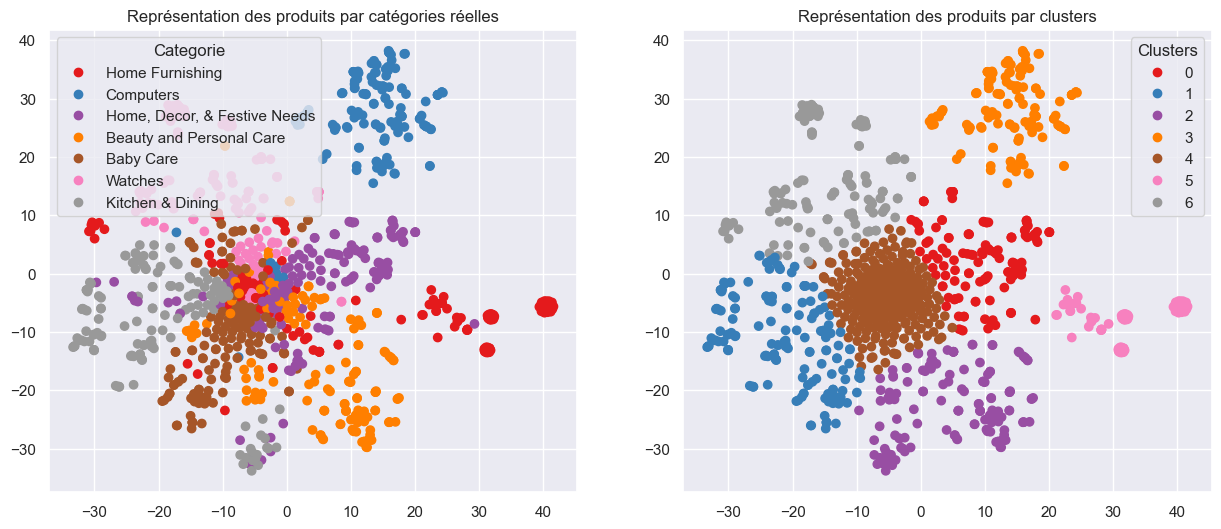

ARI :  0.3696


In [220]:
ARI_fct('clean_text_final_all_words_lem_with_no_alpha_doublons10_l5')

In [323]:
#Try with translated corpus

#Bag of words

#transformation du comptage : recuperation de la frequence de chaque mot => matrice
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(df.clean_text_final_translated)
#max_ features  = nombre de mot qu'on va mettre dans notre vocabulaire

# encode document
vector = vectorizer.transform(df.clean_text_final_translated)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1050, 3806)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Partition avec Bayes <a class="anchor" id='section_2_2' ></a>

In [327]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', '_len_text',
       'value_en', 'clean_text_final', 'clean_text_final_translated',
       'product_cat', 'value_Second_translated',
       'second_clean_text_final_translated'],
      dtype='object')

In [328]:
y = df['product_cat']
X = df[['clean_text_final','_len_text']] # Dont use Ids

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

cv.fit(X_train['clean_text_final'])

X_train_cv = cv.transform(X_train['clean_text_final']).toarray()
X_val_cv = cv.transform(X_val['clean_text_final']).toarray()

train_with_cv = pd.DataFrame(X_train_cv, columns= cv.get_feature_names_out())
train_with_cv.head()

abstract  actual  adaptor  add  adorn  age  air  alarm  allin  almond  ...  \
0         0       0        0    0      0    0    0      0      0       0  ...   
1         0       0        0    0      0    0    0      0      0       0  ...   
2         0       0        0    0      0    0    0      0      0       0  ...   
3         0       1        0    0      0    0    0      0      0       0  ...   
4         0       0        0    0      0    0    0      0      0       0  ...   

   world  would  woven  wow  wrap  yarn  year  yellow  yet  youthful  
0      0      0      0    0     0     0     0       0    0         0  
1      0      0      0    0     0     0     0       0    0         0  
2      0      0      0    0     0     0     0       0    0         0  
3      0      0      0    0     0     0     0       0    0         0  
4      0      0      0    0     0     0     0       0    0         0  

[5 rows x 670 columns]

In [329]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB().fit(X_train_cv,y_train)

In [330]:
y_train_pred = nb.predict(X_train_cv)
y_val_pred = nb.predict(X_val_cv)

In [332]:
from sklearn.metrics import classification_report

print('Train Report ---')
print(classification_report(y_train, y_train_pred))

Train Report ---
                              precision    recall  f1-score   support

                   Baby Care       0.95      0.78      0.86       123
    Beauty and Personal Care       0.73      0.90      0.81       129
                   Computers       0.95      0.85      0.90       112
             Home Furnishing       0.88      0.99      0.93       115
Home, Decor, & Festive Needs       0.83      0.79      0.81       120
            Kitchen & Dining       0.93      0.82      0.87       124
                     Watches       0.93      1.00      0.96       117

                    accuracy                           0.88       840
                   macro avg       0.89      0.88      0.88       840
                weighted avg       0.88      0.88      0.87       840



In [333]:
print('Validation Report ---')
print(classification_report(y_val, y_val_pred))

Validation Report ---
                              precision    recall  f1-score   support

                   Baby Care       0.89      0.63      0.74        27
    Beauty and Personal Care       0.57      0.95      0.71        21
                   Computers       0.91      0.76      0.83        38
             Home Furnishing       0.89      0.97      0.93        35
Home, Decor, & Festive Needs       0.77      0.80      0.79        30
            Kitchen & Dining       0.95      0.81      0.88        26
                     Watches       1.00      1.00      1.00        33

                    accuracy                           0.85       210
                   macro avg       0.86      0.85      0.84       210
                weighted avg       0.87      0.85      0.85       210



In [339]:
y = df['product_cat']
X = df[['second_clean_text_final_translated','_len_text']] # Dont use Ids

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

cv.fit(X_train['second_clean_text_final_translated'])

X_train_cv = cv.transform(X_train['second_clean_text_final_translated']).toarray()
X_val_cv = cv.transform(X_val['second_clean_text_final_translated']).toarray()

train_with_cv = pd.DataFrame(X_train_cv, columns= cv.get_feature_names_out())
train_with_cv.head()

abstract  actual  adaptor  add  adorn  age  air  alarm  allin  almond  ...  \
0         0       0        0    0      0    0    0      0      0       0  ...   
1         0       0        0    0      0    0    0      0      0       0  ...   
2         0       0        0    0      0    0    0      0      0       0  ...   
3         0       1        0    0      0    0    0      0      0       0  ...   
4         0       0        0    0      0    0    0      0      0       0  ...   

   world  would  woven  wow  wrap  yarn  year  yellow  yet  youthful  
0      0      0      0    0     0     0     0       0    0         0  
1      0      0      0    0     0     0     0       0    0         0  
2      0      0      0    0     0     0     0       0    0         0  
3      0      0      0    0     0     0     0       0    0         0  
4      0      0      0    0     0     0     0       0    0         0  

[5 rows x 670 columns]

In [340]:
nb=MultinomialNB().fit(X_train_cv,y_train)

In [341]:
y_train_pred = nb.predict(X_train_cv)
y_val_pred = nb.predict(X_val_cv)

In [342]:
from sklearn.metrics import classification_report

print('Train Report ---')
print(classification_report(y_train, y_train_pred))

Train Report ---
                              precision    recall  f1-score   support

                   Baby Care       0.95      0.78      0.86       123
    Beauty and Personal Care       0.73      0.90      0.81       129
                   Computers       0.95      0.85      0.90       112
             Home Furnishing       0.88      0.99      0.93       115
Home, Decor, & Festive Needs       0.83      0.79      0.81       120
            Kitchen & Dining       0.93      0.82      0.87       124
                     Watches       0.93      1.00      0.96       117

                    accuracy                           0.88       840
                   macro avg       0.89      0.88      0.88       840
                weighted avg       0.88      0.88      0.87       840



In [343]:
print('Validation Report ---')
print(classification_report(y_val, y_val_pred))

Validation Report ---
                              precision    recall  f1-score   support

                   Baby Care       0.89      0.63      0.74        27
    Beauty and Personal Care       0.57      0.95      0.71        21
                   Computers       0.91      0.76      0.83        38
             Home Furnishing       0.89      0.97      0.93        35
Home, Decor, & Festive Needs       0.77      0.80      0.79        30
            Kitchen & Dining       0.95      0.81      0.88        26
                     Watches       1.00      1.00      1.00        33

                    accuracy                           0.85       210
                   macro avg       0.86      0.85      0.84       210
                weighted avg       0.87      0.85      0.85       210



# Word2Vec <a class="anchor" id='section_2_3' ></a>

In [285]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [220]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df['clean_text_final'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [145]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 682
Word2Vec trained


In [146]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 683


In [147]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (683, 300)


In [148]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           204900    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 204,900
Trainable params: 204,900
Non-trainable params: 0
_________________________________________________________________


2022-12-14 16:53:24.100929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [150]:
# Exécution du modèle

embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 974us/step


(1050, 300)

In [151]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.4219 time :  5.0


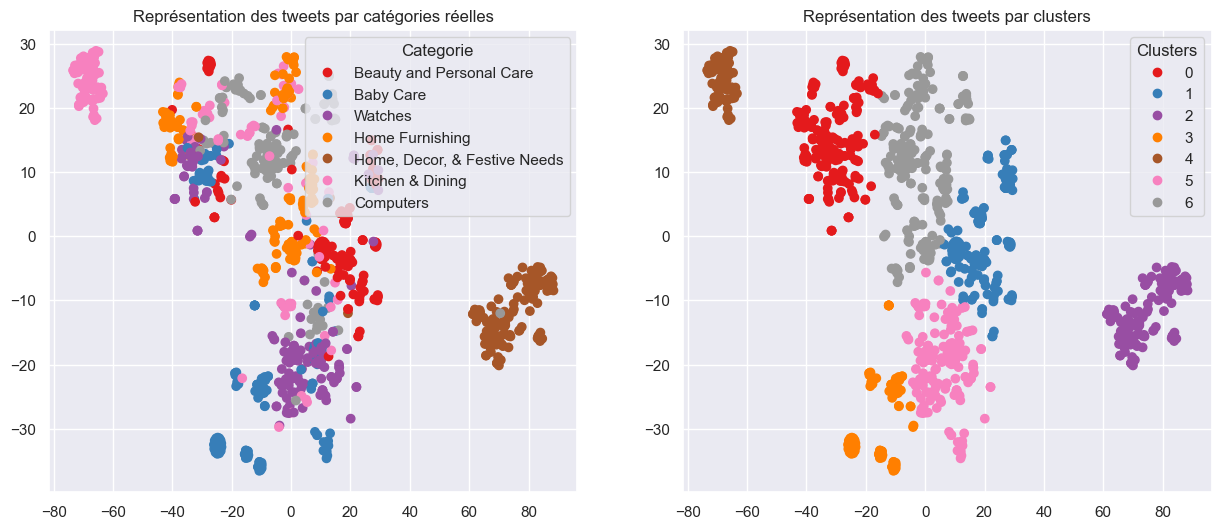

ARI :  0.4219


In [152]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Bert <a class="anchor" id='section_2_4' ></a>

In [111]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

2023-01-24 16:23:10.946800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/anaconda3/lib/python3.9/site-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [112]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


In [110]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [109]:
# To use bert we need to take the integrality of the sentence because the model will capture context, 
# so we must change the tokenization to not erase too many words

stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [95]:
df['sentence_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))
df['sentence_dl']

0       key features of elegance polyester multicolor ...
1       specifications of sathiyas cotton bath towel (...
2       key features of eurospa cotton terry face towe...
3       key features of santosh royal fashion cotton p...
4       key features of jaipur print cotton floral kin...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker ( pack ...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker fo...
1049    buy uberlyfe large vinyl sticker for rs.595 on...
Name: sentence_dl, Length: 1050, dtype: object

In [230]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences_bert = df['sentence_dl'].to_list()

loading configuration file config.json from cache at /Users/jeaneudesdesgraviers/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at /Users/jeaneudesdesgraviers/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b61

In [231]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences_bert, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at /Users/jeaneudesdesgraviers/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/jeaneudesdesgraviers/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db

1/1 [==============================] - 1s 545ms/step
temps traitement :  79.0


In [232]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3281 time :  5.0


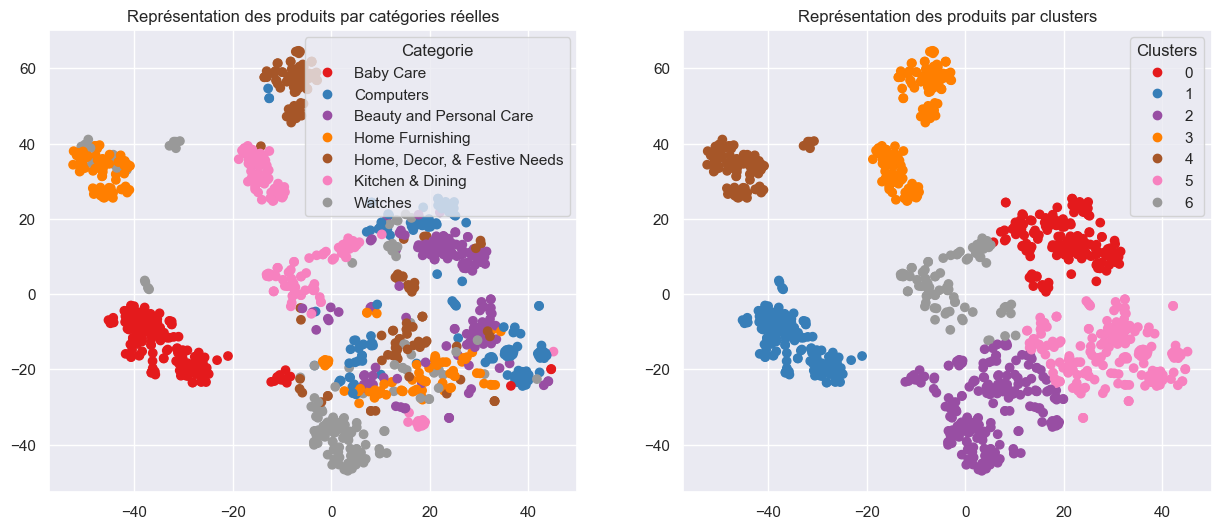

ARI :  0.3281


In [233]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder <a class="anchor" id='section_2_5' ></a>

In [88]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [89]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


In [90]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2023-01-02 11:28:20.555000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [91]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [96]:
batch_size = 10
sentences = df['sentence_dl'].to_list()

In [97]:
features_USE = feature_USE_fct(sentences, batch_size)

In [98]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4454 time :  4.0


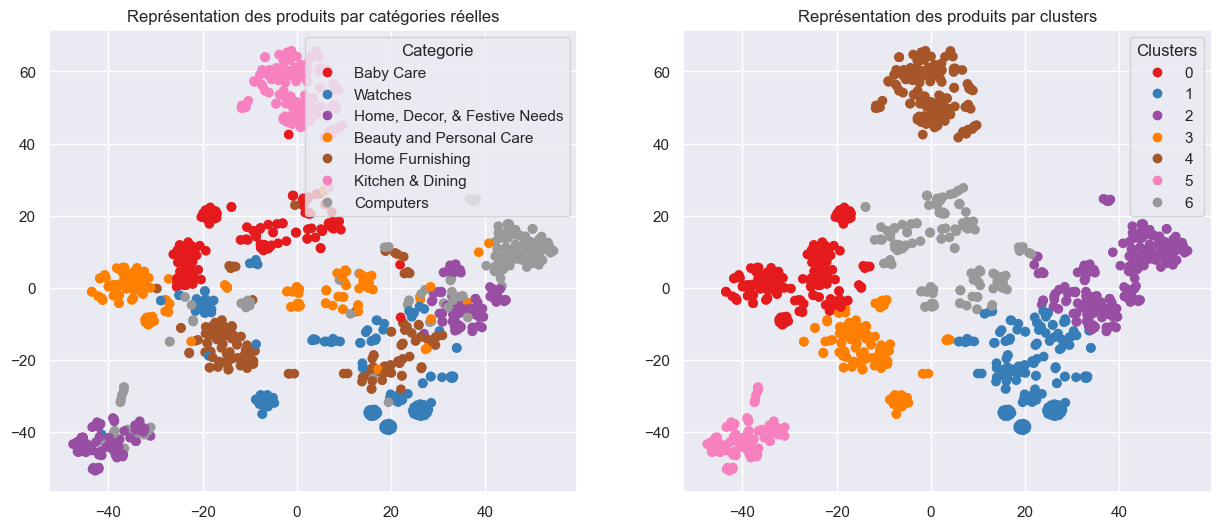

ARI :  0.4454


In [99]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [174]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

In [123]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
laptop usb warranty shapes mouse pad skin print power multicolor
Topic 1:
skin oil smoothing fragrance traits shampoo ml tea price extract
Topic 2:
polyester eyelet curtain door carpet cm aroma comfort design height
Topic 3:
soap kit mxofere honey almond aloevera rose bathing jasmine papaya
Topic 4:
mini repair almond dimension cms brass eye drawer 33 699
Topic 5:
watch analog men great india discounts women dial strap boys
Topic 6:
brush naturals smooth shampoo traits form types mirror 25 boys
Topic 7:
quality mugs art pizza high cutter perfect steel make gifts
Topic 8:
products free shipping cash delivery genuine buy rs flipkart com
Topic 9:
exotic buddha cm india showpiece massage curtain 36 30 rs
Topic 10:
exotic haveli lal wooden showpiece appeal butter 10 cm gorgeous
Topic 11:
ganesha lord cm exotic showpiece carved india prices best cash
Topic 12:
mug ceramic coffee mm safe ml tea gift material perfect
Topic 13:
cm features light type color warranty inch model led bedsh

In [ ]:
# Consequently to our results, we can see that Bag of words and Tf-idf are not efficient four our dataset.
# Word embedding and transformers also don't show sufficient result, this is due to not precised description with poor value tokens.
# Bayes partition could be an accurate choice for this dataset.

# Annexe : trying out spacy <a class="anchor" id='chapter5' ></a>

In [89]:
import collections

## tag text and exctract tags into a list
df["tags"] = df["clean_text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in df["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product  ...  \
0                    False  ...   
1                    False  ...   
2                    False  ...   
3                    False  ...   
4                    False  ...   

                              product_specifications _len_text  \
0  {"product_specification"=>[{"key"=>"Brand", "v...      1420   
1  {"product_specification"=>[{"key"=>"Machine Wa...       444   
2  {"product_specification"=>[{"key"=>"Material",...      1258   
3  {"product_specification"=>[{"key"=>"Brand", "v...       858   
4  {"product_specification"=>[{"key"=>"Machine Wa...      1197   

                                          clean_text  \
0  key multicolor abstract eyelet door curtain fl...   
1  cotton bath towel bath towel red yellow blue b...   
2  key cotton face towel set size small height in...   
3  key royal fashion cotton king royal wedding ro...   
4  key print cotton floral king cotton print cott...   

                          tags tags_NORP  tags_DATE tags_ORDINAL tags_GPE  \
0  [{('first', 'ORDINAL'): 1}]         0          0            1        0   
1                           []         0          0            0        0   
2  [{('first', 'ORDINAL'): 1}]         0          0            1        0   
3                           []         0          0            0        0   
4                           []         0          0            0        0   

   tags_TIME  tags_CARDINAL  
0          0              0  
1          0              0  
2          0              0  
3          0              0  
4          0              0  

[5 rows x 24 columns]

In [ ]:
df['tags_NORP'].value_counts()

0    984
1      1
Name: tags_NORP, dtype: int64